# Project Description
For this project, a subset of LendingClud dataset from Kaggle will be used.

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.


# Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), we will build machine learning models that can predict whether or not a borrower will pay back his or her loan. This way in the future when we get new potential customers we can assess whether they are likely to pay back their loans. The "loan_status" column, which contains our label, will later be converted into the target variable 'charge_off' for subsequent machine learning stage.

For this project, we will build several machine learning models using different algorithms, such as:

1. Logistic Regression (linear)
2. AdaBoost Classifier (ensemble-boosting)
3. Gradient Boosting Classifier (ensemble-boosting)
4. Extreme Gradient Boosting (XGBoost) Classifier (ensemble-boosting)
5. Random Forest (ensemble-bagging)
6. Neural Network (optimization-based)

For performance evaluation of models above, we will compare their area under curve (AUC) of receiver operating characteristic (ROC) curves, to see if any significant performance differences among different models. At the end of this notebook, a conclusion for this project will be presented.

# Import required libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_colwidth', None)
sns.set_style("whitegrid")

# Import the dataset

Load the dataset "lending_club_loan_two.csv"

In [2]:
df = pd.read_csv("lending_club_loan_two.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


Load another dataset "lending_club_info.csv" for descriptions of columns

In [3]:
df_info = pd.read_csv("lending_club_info.csv",index_col='LoanStatNew')
df_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


Check the descriptive statistic of the dataset:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


Plot the correlation matrix:

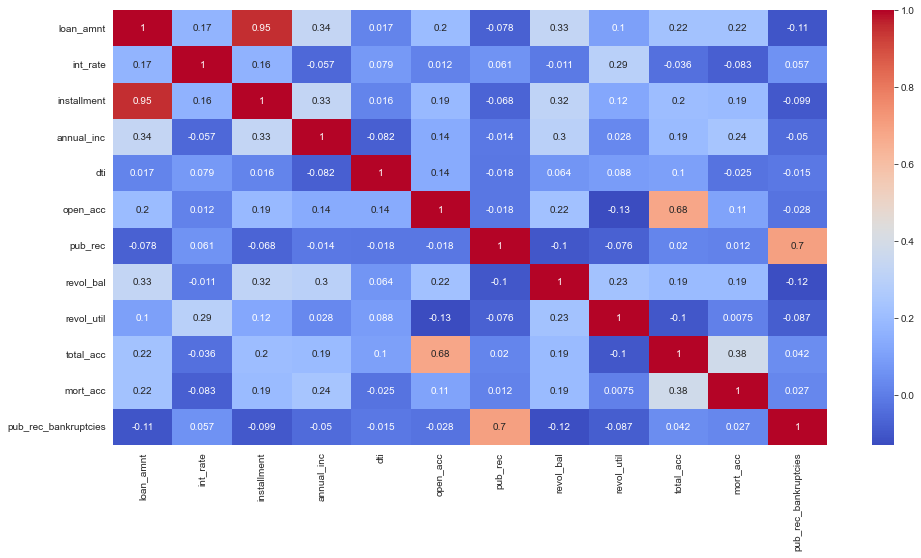

In [6]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

# Dealing with missing data

Check if any missing values in the dataset:

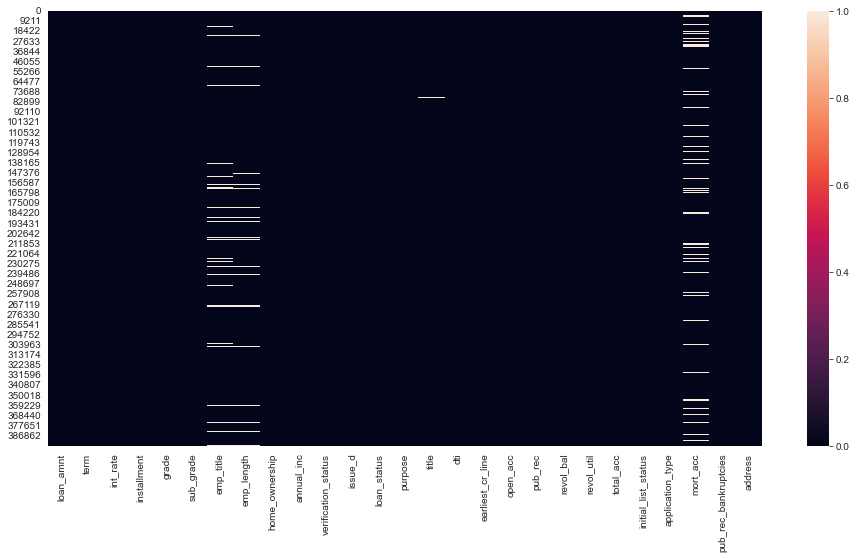

In [7]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull())
plt.show()

As shown above, there are some missing data in the dataset

Check the quantities of missing data in each column:

In [8]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

Check the ratios of number of rows with missing data to total number of rows:

In [9]:
df.isna().sum() / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004431
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
dtype: float64

From above, we will remove those missing rows in columns 'emp_length','title', 'revol_util' and 'pub_rec_bankruptcies' since the percentages of missing values are less than 5%.

In [10]:
df.dropna(subset = ['emp_length', 'title', 'revol_util', 'pub_rec_bankruptcies'], inplace = True)

Let's check the 'emp_title' column:

In [11]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [12]:
df['emp_title'].nunique()

172144

In [13]:
df['emp_title'].value_counts()

Teacher                 4367
Manager                 4231
Registered Nurse        1841
RN                      1840
Supervisor              1812
                        ... 
Oper asst                  1
LEAD COORDINATOR           1
Peppermill Casino          1
Scooter Paints             1
Gracon Services, Inc       1
Name: emp_title, Length: 172144, dtype: int64

As shown above, there are 172,144 unique job titles and it will be too much to consider. Perhaps it is possible to group some of the job titles together. For the purpose of this project, 'emp_title' column will be dropped.

In [14]:
df.drop('emp_title', axis = 1,inplace= True)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


Let's check the 'mort_acc' column:

In [15]:
df['mort_acc'].value_counts()

0.0     132730
1.0      57544
2.0      47319
3.0      35797
4.0      26224
5.0      17112
6.0      10401
7.0       5660
8.0       2951
9.0       1558
10.0       817
11.0       448
12.0       246
13.0       136
14.0       104
15.0        60
16.0        36
17.0        20
18.0        17
19.0        14
20.0        12
24.0         9
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

To try to fill in the missing values in 'mort_acc', let's check its correlation with other variables:

In [16]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.080808
dti                    -0.057879
revol_util              0.009101
pub_rec                 0.013554
pub_rec_bankruptcies    0.028581
open_acc                0.107809
installment             0.194675
revol_bal               0.198635
loan_amnt               0.224000
annual_inc              0.238951
total_acc               0.379183
mort_acc                1.000000
Name: mort_acc, dtype: float64

From above, we can see that 'mort_acc' is a little correlated with 'total_acc'. This should be understandable since if the person has more number of mortgage accounts, most probably he or she has more number of credit lines.

Description for 'mort_acc' column:

In [17]:
df_info.loc['mort_acc']['Description']

'Number of mortgage accounts.'

Description for 'total_acc' column:

In [18]:
df_info.loc['total_acc']['Description']

"The total number of credit lines currently in the borrower's credit file"

Since 'mort_acc' is somewhat related to 'total_acc', we will estimate the missing values of 'mort_acc' based on 'total_acc'. We will fill in those missing values in 'mort_acc' using the its mean value of groupby 'total_acc'.

In [19]:
mort_acc_mean_by_total_acc = df.groupby('total_acc')['mort_acc'].mean()
mort_acc_mean_by_total_acc

total_acc
2.0      0.000000
3.0      0.042945
4.0      0.069393
5.0      0.100284
6.0      0.148097
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 117, dtype: float64

In [20]:
def fill_mort_acc(total_acc,mort_acc):
    
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    '''
    
    if np.isnan(mort_acc) == True:
        return mort_acc_mean_by_total_acc[total_acc]
    else:
        return mort_acc

In [21]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [22]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

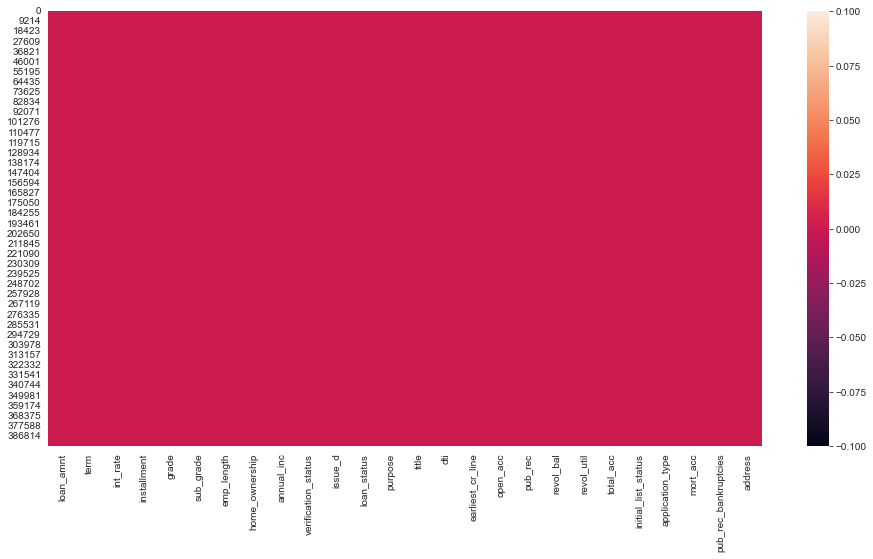

In [23]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull())
plt.show()

From above, there is no more missing values in the dataset.

Check again df and it's descriptive statistic:

In [24]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375389 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             375389 non-null  float64
 1   term                  375389 non-null  object 
 2   int_rate              375389 non-null  float64
 3   installment           375389 non-null  float64
 4   grade                 375389 non-null  object 
 5   sub_grade             375389 non-null  object 
 6   emp_length            375389 non-null  object 
 7   home_ownership        375389 non-null  object 
 8   annual_inc            375389 non-null  float64
 9   verification_status   375389 non-null  object 
 10  issue_d               375389 non-null  object 
 11  loan_status           375389 non-null  object 
 12  purpose               375389 non-null  object 
 13  title                 375389 non-null  object 
 14  dti                   375389 non-null  float64
 15  

In [26]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,375389.0,14258.951181,8370.583437,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,375389.0,13.634911,4.471773,5.32,10.49,13.33,16.49,30.99
installment,375389.0,435.729411,251.079013,16.08,254.05,379.44,572.75,1533.81
annual_inc,375389.0,75402.274178,62306.347527,4000.00,46000.00,65000.00,90000.00,8706582.00
dti,375389.0,17.291197,8.106699,0.00,11.27,16.85,22.88,380.53
open_acc,375389.0,11.373530,5.142391,1.00,8.00,11.00,14.00,90.00
pub_rec,375389.0,0.172275,0.524398,0.00,0.00,0.00,0.00,86.00
revol_bal,375389.0,15977.029420,20650.113979,0.00,6110.00,11306.00,19787.00,1743266.00
revol_util,375389.0,53.980260,24.414334,0.00,36.10,55.00,73.00,892.30
total_acc,375389.0,25.482539,11.882482,2.00,17.00,24.00,32.00,151.00


# Exploratory Data Analysis

Let's check each individual column:

Column 'loan_amnt':

In [27]:
df_info.loc['loan_amnt']['Description']

'The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.'

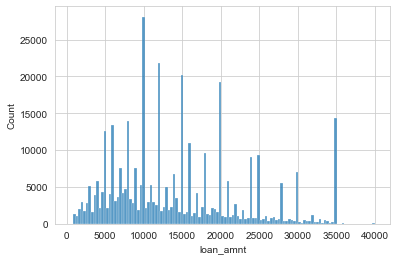

In [28]:
sns.histplot(x = 'loan_amnt',data = df)
plt.show()

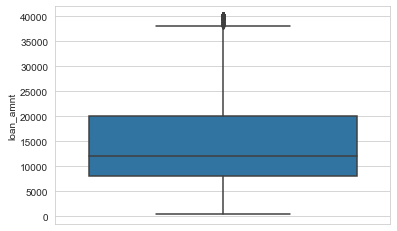

In [29]:
sns.boxplot(y = 'loan_amnt',data = df)
plt.show()

Column 'term':

In [30]:
df_info.loc['term']['Description']

'The number of payments on the loan. Values are in months and can be either 36 or 60.'

In [31]:
df['term'].value_counts()

 36 months    284545
 60 months     90844
Name: term, dtype: int64

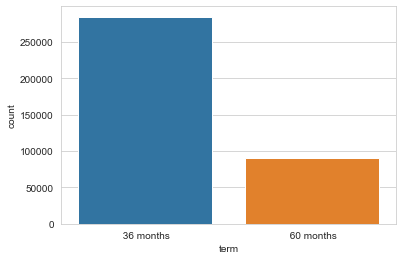

In [32]:
sns.countplot(x = 'term', data = df)
plt.show()

In [33]:
# Convert 'term' into month in integer
df['term'] = df['term'].apply(lambda x: 36 if x == ' 36 months' else 60)

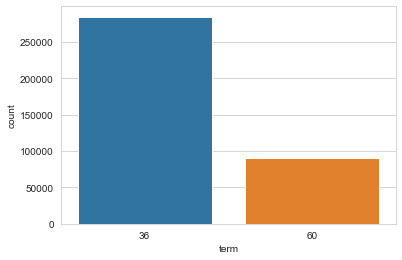

In [34]:
sns.countplot(x = 'term', data = df)
plt.show()

Column 'int_rate':

In [35]:
df_info.loc['int_rate']['Description']

'Interest Rate on the loan'

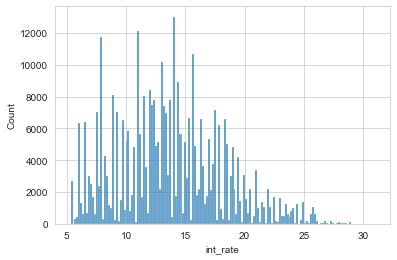

In [36]:
sns.histplot(x = 'int_rate', data = df)
plt.show()

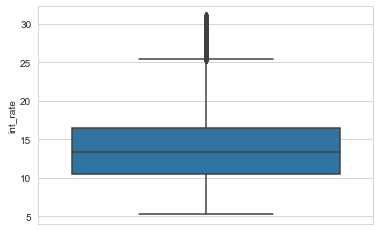

In [37]:
sns.boxplot(y = 'int_rate', data = df)
plt.show()

Column 'installment':

In [38]:
df_info.loc['installment']['Description']

'The monthly payment owed by the borrower if the loan originates.'

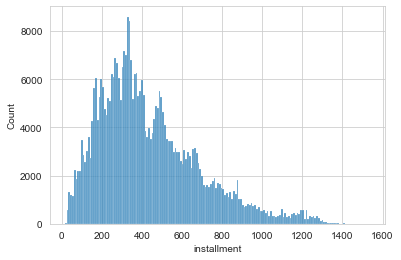

In [39]:
sns.histplot(x = 'installment', data = df)
plt.show()

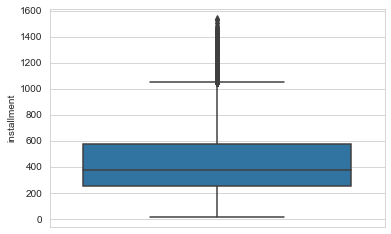

In [40]:
sns.boxplot(y = 'installment', data = df)
plt.show()

Column 'grade':

In [41]:
df_info.loc['grade']['Description']

'LC assigned loan grade'

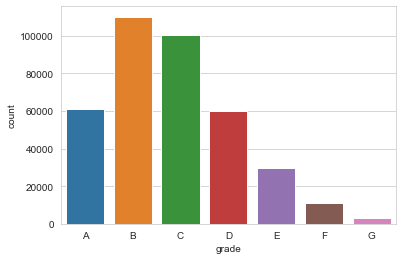

In [42]:
sns.countplot(x = 'grade', data = df, order = list(np.sort(df['grade'].unique())))
plt.show()

In [43]:
# 'grade' contains duplicate information from 'sub_grade' and will be dropped
df.drop('grade', axis = 1, inplace = True)

Column 'sub_grade':

In [44]:
df_info.loc['sub_grade']['Description']

'LC assigned loan subgrade'

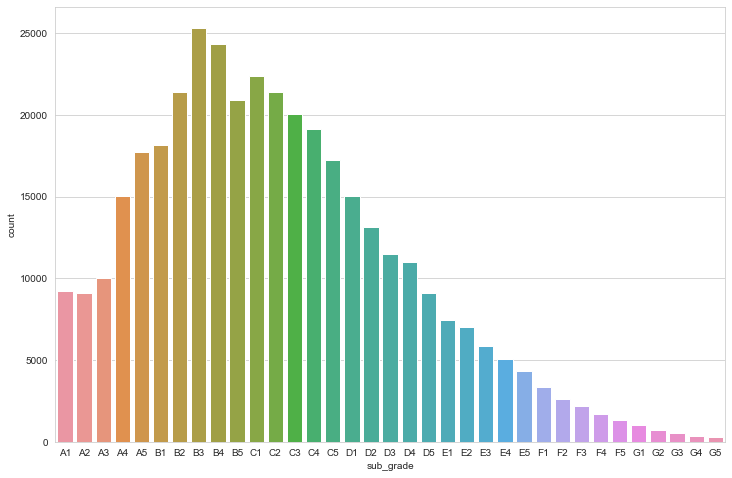

In [45]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'sub_grade', data = df, order = list(np.sort(df['sub_grade'].unique())))
plt.show()

In [46]:
# Since 'sub_grade' can be thought as ordinal categorical data, we will encode it into numeric format
df['sub_grade'] = df['sub_grade'].map({
                                        'A1': 1,
                                        'A2': 2,
                                        'A3': 3,
                                        'A4': 4,
                                        'A5': 5,
                                        'B1': 6,
                                        'B2': 7,
                                        'B3': 8,
                                        'B4': 9,
                                        'B5': 10,
                                        'C1': 11,
                                        'C2': 12,
                                        'C3': 13,
                                        'C4': 14,
                                        'C5': 15,
                                        'D1': 16,
                                        'D2': 17,
                                        'D3': 18,
                                        'D4': 19,
                                        'D5': 20,
                                        'E1': 21,
                                        'E2': 22,
                                        'E3': 23,
                                        'E4': 24,
                                        'E5': 25,
                                        'F1': 26,
                                        'F2': 27,
                                        'F3': 28,
                                        'F4': 29,
                                        'F5': 30,
                                        'G1': 31,
                                        'G2': 32,
                                        'G3': 33,
                                        'G4': 34,
                                        'G5': 35
                                    })

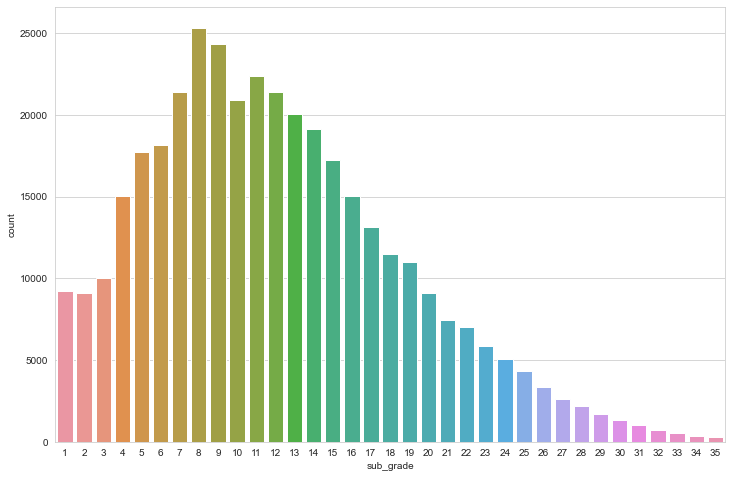

In [47]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'sub_grade', data = df, order = list(np.sort(df['sub_grade'].unique())))
plt.show()

Column 'emp_length':

In [48]:
df_info.loc['emp_length']['Description']

'Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. '

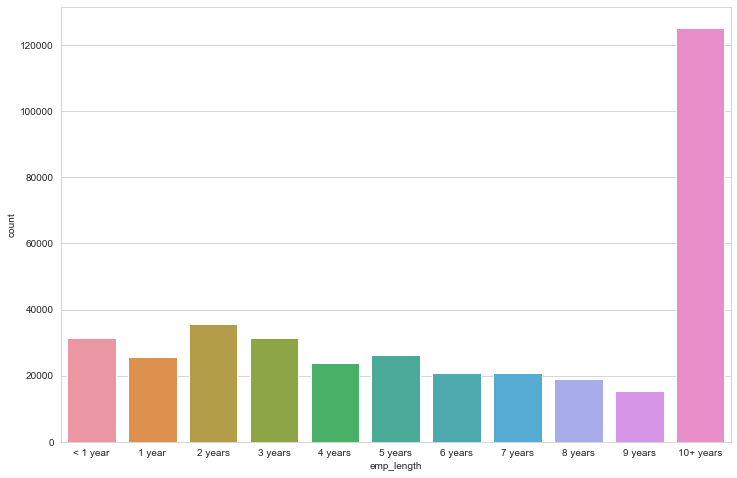

In [49]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'emp_length', data = df, order = ['< 1 year','1 year','2 years','3 years','4 years','5 years',
                                                    '6 years','7 years','8 years','9 years','10+ years'])
plt.show()

In [50]:
# Since 'emp_length' can be thought as ordinal categorical data, we will encode it into numeric format
df['emp_length'] = df['emp_length'].map({
                                            '< 1 year': 0,                                  
                                            '1 year': 1, 
                                            '2 years': 2,
                                            '3 years': 3,
                                            '4 years': 4,
                                            '5 years': 5,
                                            '6 years': 6,
                                            '7 years': 7,
                                            '8 years': 8,
                                            '9 years': 9,
                                            '10+ years': 10
                                        })

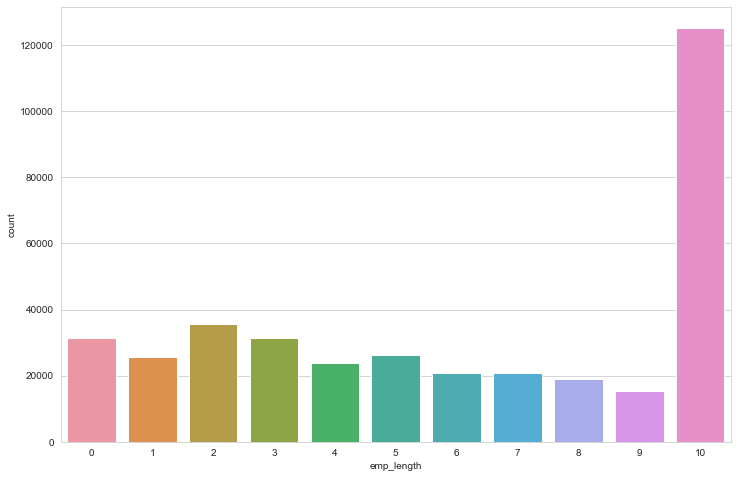

In [51]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'emp_length', data = df)
plt.show()

Column 'home_ownership':

In [52]:
df_info.loc['home_ownership']['Description']

'The home ownership status provided by the borrower during registration\xa0or obtained from the credit report.\xa0Our values are: RENT, OWN, MORTGAGE, OTHER'

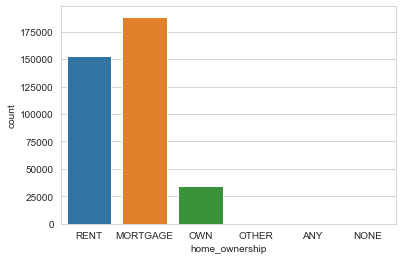

In [53]:
sns.countplot(x = 'home_ownership', data = df)
plt.show()

In [54]:
df['home_ownership'].value_counts()

MORTGAGE    188645
RENT        152511
OWN          34095
OTHER          107
NONE            28
ANY              3
Name: home_ownership, dtype: int64

In [55]:
# Combine 'ANY' and 'NONE' columns into 'OTHER' column
df['home_ownership'] = df['home_ownership'].apply(lambda x: 'OTHER' if (x == 'ANY' or x == 'NONE') else x)

In [56]:
df['home_ownership'].value_counts()

MORTGAGE    188645
RENT        152511
OWN          34095
OTHER          138
Name: home_ownership, dtype: int64

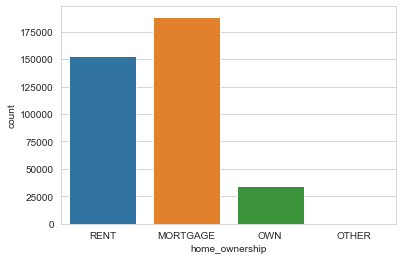

In [57]:
sns.countplot(x = 'home_ownership', data = df)
plt.show()

Column 'annual_inc':

In [58]:
df_info.loc['annual_inc']['Description']

'The self-reported annual income provided by the borrower during registration.'

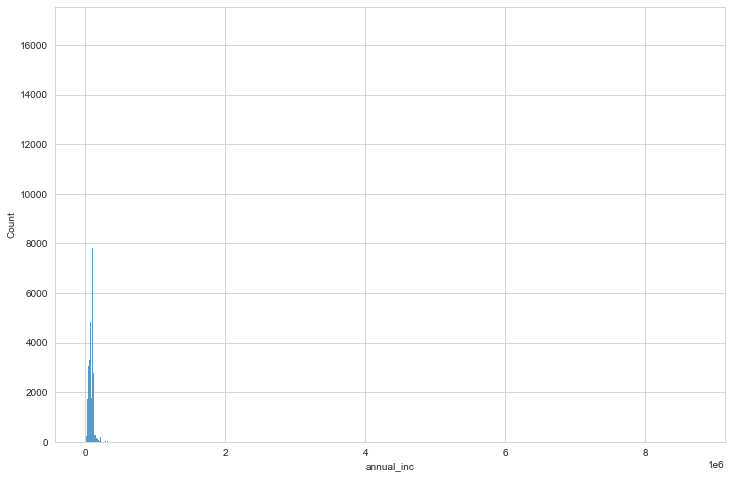

In [59]:
plt.figure(figsize = (12,8))
sns.histplot(x = 'annual_inc', data = df)
plt.show()

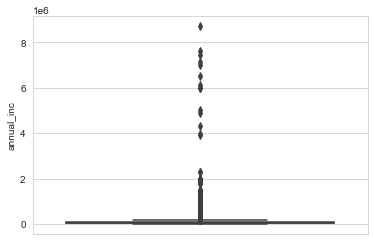

In [60]:
sns.boxplot(y = 'annual_inc', data = df)
plt.show()

Column 'verification_status':

In [61]:
df_info.loc['verification_status']['Description']

'Indicates if income was verified by LC, not verified, or if the income source was verified'

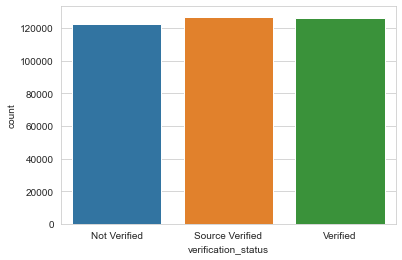

In [62]:
sns.countplot(x = 'verification_status', data = df)
plt.show()

Column 'issue_d':

In [63]:
df_info.loc['issue_d']['Description']

'The month which the loan was funded'

In [64]:
# issue_d to be dropped (This would be data leakage, we wouldn't know beforehand whether or not a loan would be
# issued when using our model, so in theory we wouldn't have an issue_date)
df.drop('issue_d', axis = 1, inplace= True)

In [65]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,9,10,RENT,117000.0,Not Verified,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,10,4,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,8,0,RENT,43057.0,Source Verified,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,220.65,2,6,RENT,54000.0,Not Verified,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60,17.27,609.33,15,9,MORTGAGE,55000.0,Verified,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


Column 'loan_status':

In [66]:
df_info.loc['loan_status']['Description']

'Current status of the loan'

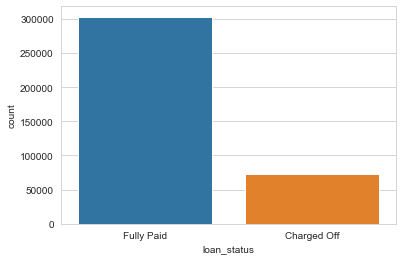

In [67]:
sns.countplot(x = 'loan_status', data = df)
plt.show()

In [68]:
# This column 'loan_status' will be converted to the target column 'charge_off' which we are going to predict
# Create target column 'charge_off': assign value to 1 if the person did charge off, otherwise 0
df['charge_off'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

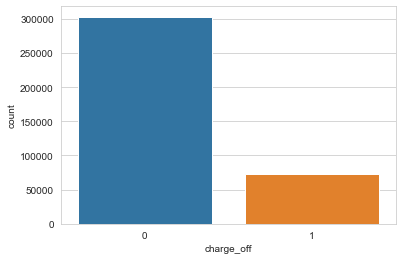

In [69]:
sns.countplot(x = 'charge_off', data = df)
plt.show()

In [70]:
# Drop 'loan_status' since it is no longer required
df.drop('loan_status', axis = 1, inplace = True)

In [71]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,charge_off
0,10000.0,36,11.44,329.48,9,10,RENT,117000.0,Not Verified,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",0
1,8000.0,36,11.99,265.68,10,4,MORTGAGE,65000.0,Not Verified,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",0
2,15600.0,36,10.49,506.97,8,0,RENT,43057.0,Source Verified,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",0
3,7200.0,36,6.49,220.65,2,6,RENT,54000.0,Not Verified,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",0
4,24375.0,60,17.27,609.33,15,9,MORTGAGE,55000.0,Verified,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",1


Column 'purpose':

In [72]:
df_info.loc['purpose']['Description']

'A category provided by the borrower for the loan request. '

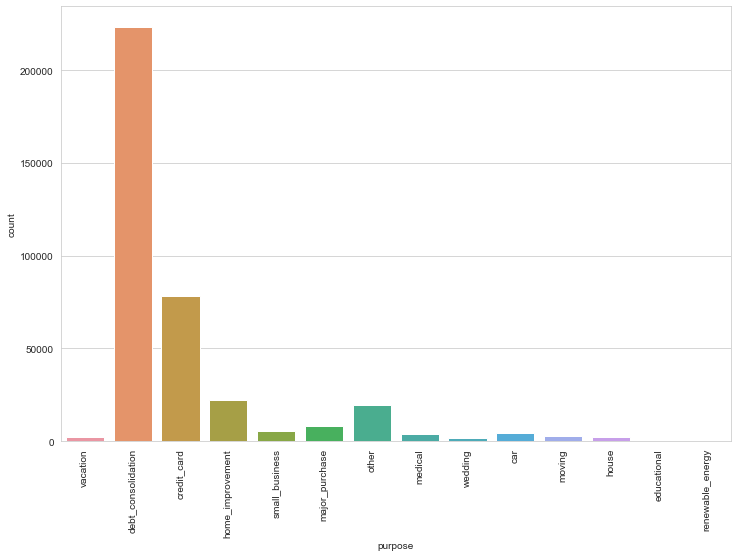

In [73]:
plt.figure(figsize = (12,8))
plot = sns.countplot(x = 'purpose', data = df)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

Column 'title':

In [74]:
df_info.loc['title']['Description']

'The loan title provided by the borrower'

In [75]:
df['title'].value_counts()

Debt consolidation                        145223
Credit card refinancing                    48729
Home improvement                           14293
Other                                      12106
Debt Consolidation                         11359
                                           ...  
Moving and Paying for Furinture                1
payoffcreditcard                               1
House construction and pool                    1
Consolidate Credit Cards and Auto Loan         1
Toxic Debt Payoff                              1
Name: title, Length: 46766, dtype: int64

In [76]:
# Drop 'title' since it contains duplicate information with 'purpose'
df.drop('title', axis = 1, inplace= True)

In [77]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,charge_off
0,10000.0,36,11.44,329.48,9,10,RENT,117000.0,Not Verified,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",0
1,8000.0,36,11.99,265.68,10,4,MORTGAGE,65000.0,Not Verified,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",0
2,15600.0,36,10.49,506.97,8,0,RENT,43057.0,Source Verified,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",0
3,7200.0,36,6.49,220.65,2,6,RENT,54000.0,Not Verified,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",0
4,24375.0,60,17.27,609.33,15,9,MORTGAGE,55000.0,Verified,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",1


Column 'dti':

In [78]:
df_info.loc['dti']['Description']

'A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.'

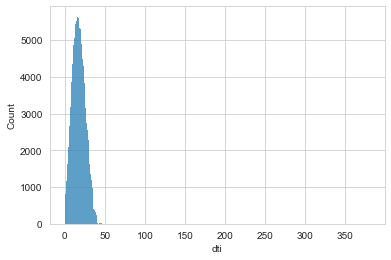

In [79]:
sns.histplot(x = 'dti', data = df)
plt.show()

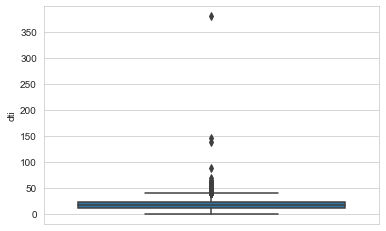

In [80]:
sns.boxplot(y = 'dti', data = df)
plt.show()

In [81]:
df['dti'].describe()

count    375389.000000
mean         17.291197
std           8.106699
min           0.000000
25%          11.270000
50%          16.850000
75%          22.880000
max         380.530000
Name: dti, dtype: float64

Column 'earliest_cr_line':

In [82]:
df_info.loc['earliest_cr_line']['Description']

"The month the borrower's earliest reported credit line was opened"

In [83]:
# Convert 'earliest_cr_line' to pandas timestamp format
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [84]:
# Create 'earliest_cr_line_year' column
df['earliest_cr_line_year'] = pd.DatetimeIndex(df['earliest_cr_line']).year

In [85]:
# Drop 'earliest_cr_line' column since we will only use its year information
df.drop('earliest_cr_line', axis = 1, inplace = True)

In [86]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,charge_off,earliest_cr_line_year
0,10000.0,36,11.44,329.48,9,10,RENT,117000.0,Not Verified,vacation,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",0,1990
1,8000.0,36,11.99,265.68,10,4,MORTGAGE,65000.0,Not Verified,debt_consolidation,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",0,2004
2,15600.0,36,10.49,506.97,8,0,RENT,43057.0,Source Verified,credit_card,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",0,2007
3,7200.0,36,6.49,220.65,2,6,RENT,54000.0,Not Verified,credit_card,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",0,2006
4,24375.0,60,17.27,609.33,15,9,MORTGAGE,55000.0,Verified,credit_card,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",1,1999


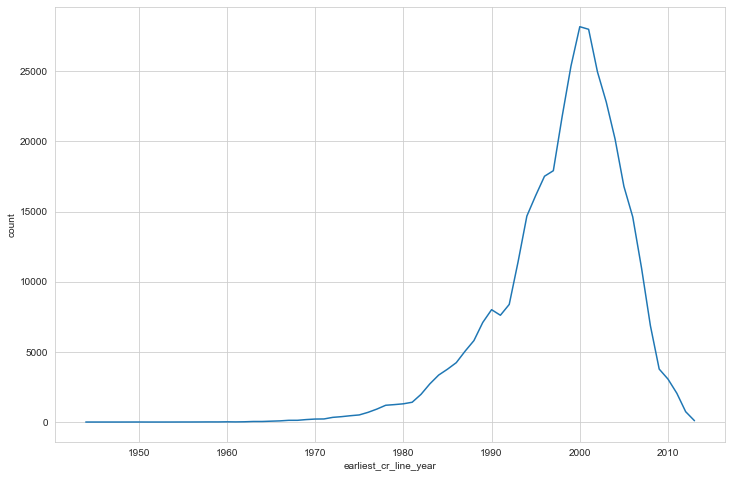

In [87]:
plt.figure(figsize = (12,8))
plt.plot(df['earliest_cr_line_year'].value_counts().sort_index())
plt.xlabel('earliest_cr_line_year')
plt.ylabel('count')
plt.show()

Column 'open_acc':

In [88]:
df_info.loc['open_acc']['Description']

"The number of open credit lines in the borrower's credit file."

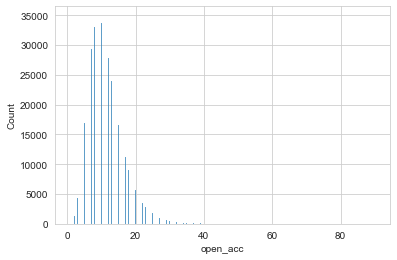

In [89]:
sns.histplot(x = 'open_acc', data = df)
plt.show()

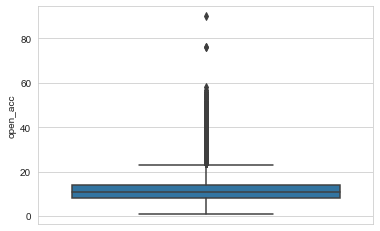

In [90]:
sns.boxplot(y = 'open_acc', data = df)
plt.show()

Column 'pub_rec':

In [91]:
df_info.loc['pub_rec']['Description']

'Number of derogatory public records'

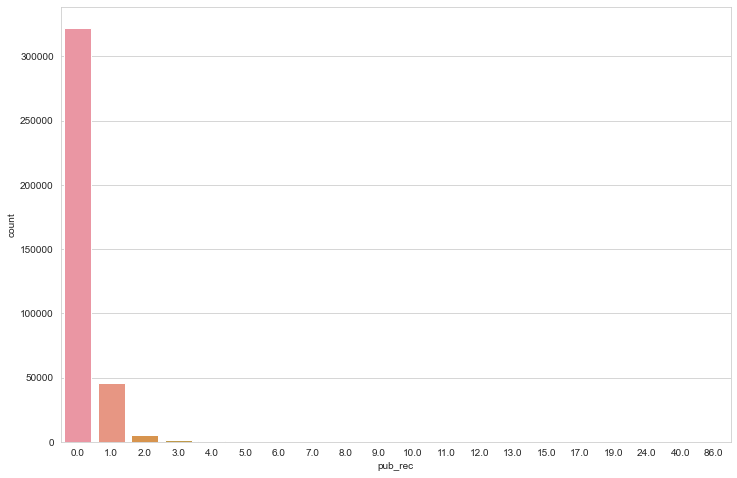

In [92]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'pub_rec', data = df)
plt.show()

In [93]:
df['pub_rec'].value_counts()

0.0     322446
1.0      45599
2.0       5026
3.0       1385
4.0        479
5.0        215
6.0        115
7.0         51
8.0         33
9.0         11
10.0        10
11.0         5
13.0         4
12.0         3
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: pub_rec, dtype: int64

In [94]:
# We will combine 'pub_rec' with value 0 into '0' group, any other into '1' group
df['pub_rec'] = df['pub_rec'].apply(lambda x: 0 if x == 0.0 else 1)

In [95]:
df['pub_rec'].value_counts()

0    322446
1     52943
Name: pub_rec, dtype: int64

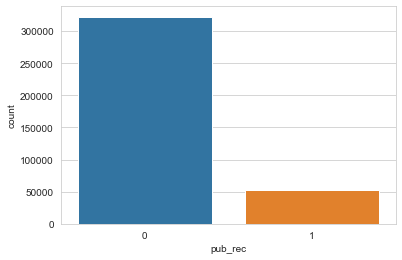

In [96]:
sns.countplot(x = 'pub_rec', data = df)
plt.show()

Column 'revol_bal':

In [97]:
df_info.loc['revol_bal']['Description']

'Total credit revolving balance'

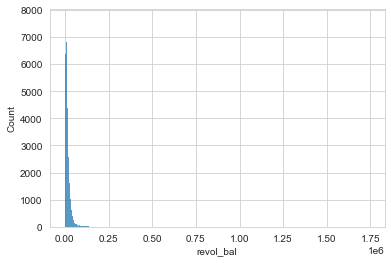

In [98]:
sns.histplot(x = 'revol_bal', data = df)
plt.show()

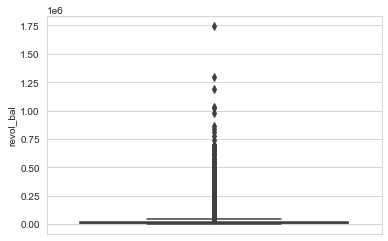

In [99]:
sns.boxplot(y = 'revol_bal', data = df)
plt.show()

Column 'revol_util':

In [100]:
df_info.loc['revol_util']['Description']

'Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.'

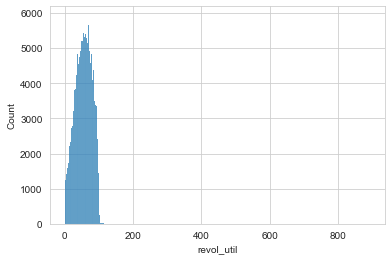

In [101]:
sns.histplot(x = 'revol_util', data = df)
plt.show()

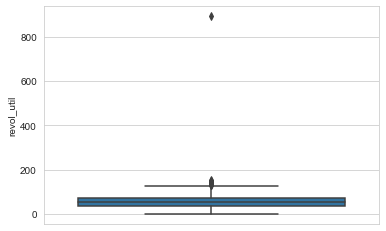

In [102]:
sns.boxplot(y = 'revol_util', data = df)
plt.show()

Column 'total_acc':

In [103]:
df_info.loc['total_acc']['Description']

"The total number of credit lines currently in the borrower's credit file"

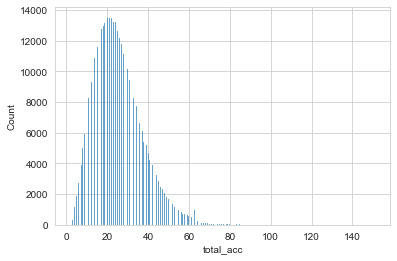

In [104]:
sns.histplot(x = 'total_acc', data = df)
plt.show()

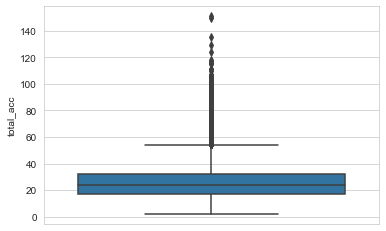

In [105]:
sns.boxplot(y = 'total_acc', data = df)
plt.show()

Column 'initial_list_status':

In [106]:
df_info.loc['initial_list_status']['Description']

'The initial listing status of the loan. Possible values are – W, F'

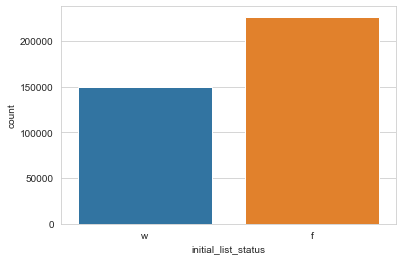

In [107]:
sns.countplot(x = 'initial_list_status', data =df)
plt.show()

Column 'application_type':

In [108]:
df_info.loc['application_type']['Description']

'Indicates whether the loan is an individual application or a joint application with two co-borrowers'

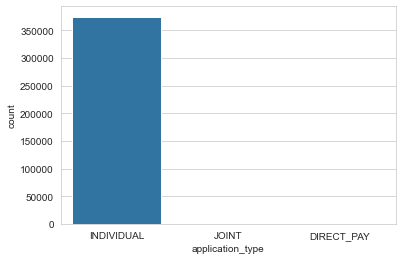

In [109]:
sns.countplot(x = 'application_type', data =df)
plt.show()

In [110]:
df['application_type'].value_counts()

INDIVIDUAL    374833
JOINT            311
DIRECT_PAY       245
Name: application_type, dtype: int64

In [111]:
# Drop 'application_type' column since majority is 'INDIVIDUAL' and this column will be useless for predicting 'charge_off'.
df.drop('application_type', axis = 1, inplace = True)

In [112]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,address,charge_off,earliest_cr_line_year
0,10000.0,36,11.44,329.48,9,10,RENT,117000.0,Not Verified,vacation,26.24,16.0,0,36369.0,41.8,25.0,w,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",0,1990
1,8000.0,36,11.99,265.68,10,4,MORTGAGE,65000.0,Not Verified,debt_consolidation,22.05,17.0,0,20131.0,53.3,27.0,f,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",0,2004
2,15600.0,36,10.49,506.97,8,0,RENT,43057.0,Source Verified,credit_card,12.79,13.0,0,11987.0,92.2,26.0,f,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",0,2007
3,7200.0,36,6.49,220.65,2,6,RENT,54000.0,Not Verified,credit_card,2.60,6.0,0,5472.0,21.5,13.0,f,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",0,2006
4,24375.0,60,17.27,609.33,15,9,MORTGAGE,55000.0,Verified,credit_card,33.95,13.0,0,24584.0,69.8,43.0,f,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",1,1999


Column 'mort_acc':

In [113]:
df_info.loc['mort_acc']['Description']

'Number of mortgage accounts.'

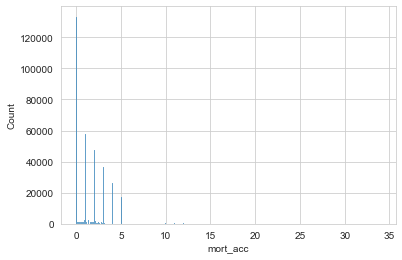

In [114]:
sns.histplot(x = 'mort_acc', data = df)
plt.show()

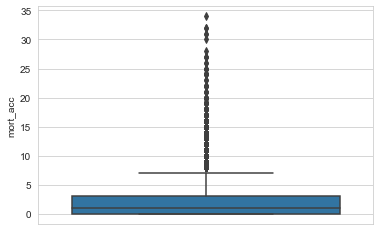

In [115]:
sns.boxplot(y = 'mort_acc', data = df)
plt.show()

Column 'pub_rec_bankruptcies':

In [116]:
df_info.loc['pub_rec_bankruptcies']['Description']

'Number of public record bankruptcies'

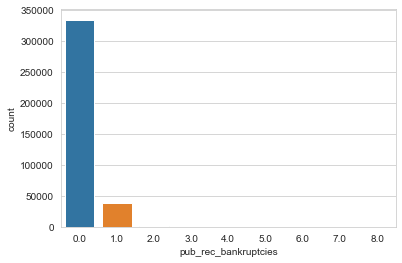

In [117]:
sns.countplot(x = 'pub_rec_bankruptcies', data = df)
plt.show()

In [118]:
df['pub_rec_bankruptcies'].value_counts()

0.0    334220
1.0     39012
2.0      1715
3.0       327
4.0        74
5.0        30
6.0         5
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [119]:
# We will combine 'pub_rec_bankruptcies' with value 0 into '0' group, any other into '1' group
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].apply(lambda x: 0 if x == 0.0 else 1)

In [120]:
df['pub_rec_bankruptcies'].value_counts()

0    334220
1     41169
Name: pub_rec_bankruptcies, dtype: int64

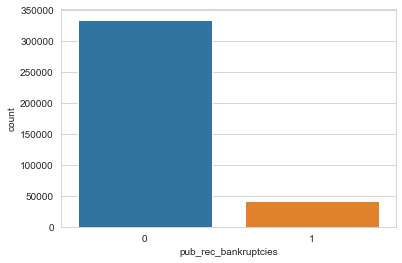

In [121]:
sns.countplot(x = 'pub_rec_bankruptcies', data = df)
plt.show()

Column 'address':

In [122]:
df['address'].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [123]:
# From the 'address' column, we will only use its information for zip code
# Create 'zip_code' column from 'address' column
df['zip_code'] = df['address'].apply(lambda x: x[-5:])

In [124]:
df['zip_code']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zip_code, Length: 375389, dtype: object

In [125]:
df['zip_code'].value_counts()

70466    53996
22690    53555
30723    53554
48052    53044
00813    43618
29597    43343
05113    43222
11650    10433
93700    10379
86630    10245
Name: zip_code, dtype: int64

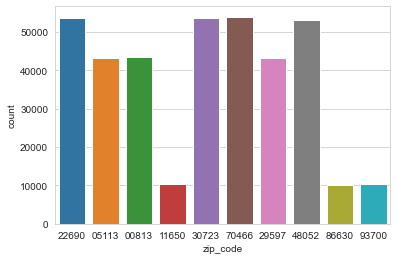

In [126]:
sns.countplot(x = 'zip_code', data = df)
plt.show()

In [127]:
# Drop 'address' column since it is no longer required
df.drop('address', axis = 1, inplace = True)

In [128]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,charge_off,earliest_cr_line_year,zip_code
0,10000.0,36,11.44,329.48,9,10,RENT,117000.0,Not Verified,vacation,26.24,16.0,0,36369.0,41.8,25.0,w,0.0,0,0,1990,22690
1,8000.0,36,11.99,265.68,10,4,MORTGAGE,65000.0,Not Verified,debt_consolidation,22.05,17.0,0,20131.0,53.3,27.0,f,3.0,0,0,2004,05113
2,15600.0,36,10.49,506.97,8,0,RENT,43057.0,Source Verified,credit_card,12.79,13.0,0,11987.0,92.2,26.0,f,0.0,0,0,2007,05113
3,7200.0,36,6.49,220.65,2,6,RENT,54000.0,Not Verified,credit_card,2.60,6.0,0,5472.0,21.5,13.0,f,0.0,0,0,2006,00813
4,24375.0,60,17.27,609.33,15,9,MORTGAGE,55000.0,Verified,credit_card,33.95,13.0,0,24584.0,69.8,43.0,f,1.0,0,1,1999,11650


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375389 entries, 0 to 396029
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              375389 non-null  float64
 1   term                   375389 non-null  int64  
 2   int_rate               375389 non-null  float64
 3   installment            375389 non-null  float64
 4   sub_grade              375389 non-null  int64  
 5   emp_length             375389 non-null  int64  
 6   home_ownership         375389 non-null  object 
 7   annual_inc             375389 non-null  float64
 8   verification_status    375389 non-null  object 
 9   purpose                375389 non-null  object 
 10  dti                    375389 non-null  float64
 11  open_acc               375389 non-null  float64
 12  pub_rec                375389 non-null  int64  
 13  revol_bal              375389 non-null  float64
 14  revol_util             375389 non-nu

Let's check the target variable ('charge_off') vs each independent variable:

'charge_off' vs 'loan_amnt':

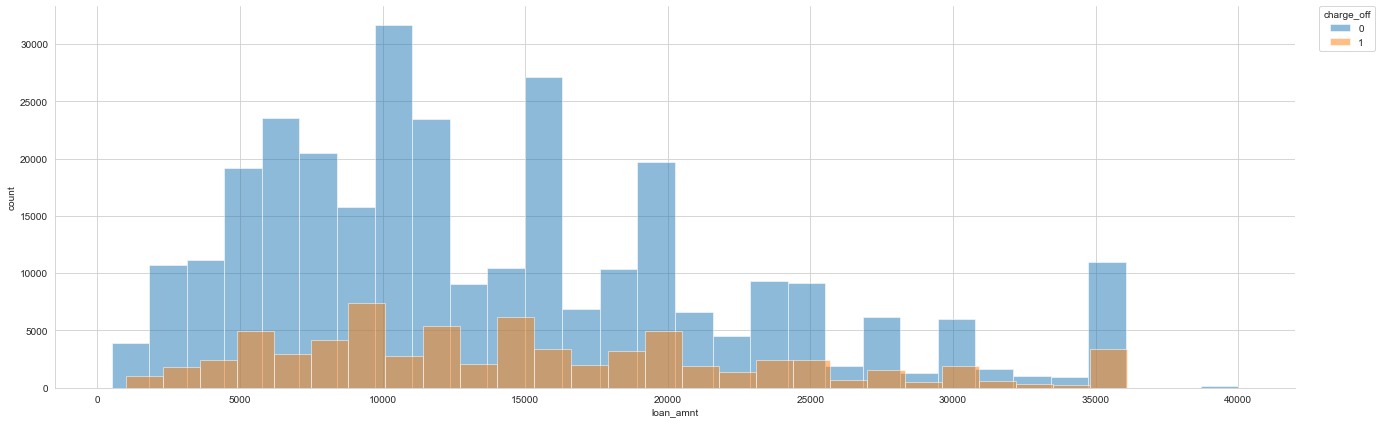

In [130]:
g = sns.FacetGrid(data = df,hue = 'charge_off',height=6,aspect=3)
g = g.map(plt.hist,"loan_amnt",alpha = 0.5,bins = 30)
plt.legend(title = 'charge_off', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('count')
plt.show()

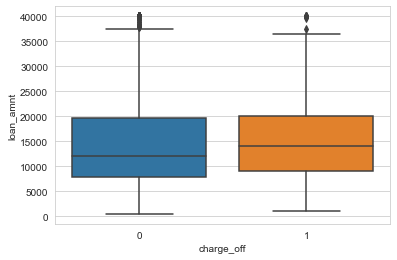

In [131]:
sns.boxplot(x = 'charge_off', y = 'loan_amnt', data = df)
plt.show()

'charge_off' vs 'term':

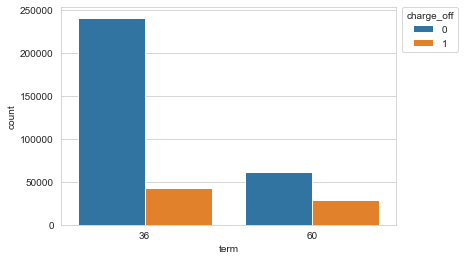

In [132]:
sns.countplot(x = 'term', data = df, hue = 'charge_off')
plt.legend(title = 'charge_off', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [133]:
# Calculate the charge off rate of each term group:

In [134]:
np.sort(df['term'].unique())

array([36, 60], dtype=int64)

In [135]:
df.groupby('term').count()['charge_off']

term
36    284545
60     90844
Name: charge_off, dtype: int64

In [136]:
df[df['charge_off'] == 1].groupby('term').count()['charge_off']

term
36    43355
60    28855
Name: charge_off, dtype: int64

In [137]:
pd.DataFrame(
             {'term':np.sort(df['term'].unique()),
              'charge_off_rate': list(df[df['charge_off'] == 1].groupby('term').count()['charge_off'] /
              df.groupby('term').count()['charge_off'])}
            )

,term,charge_off_rate
0,36,0.152366
1,60,0.317632


'charge_off' vs 'int_rate':

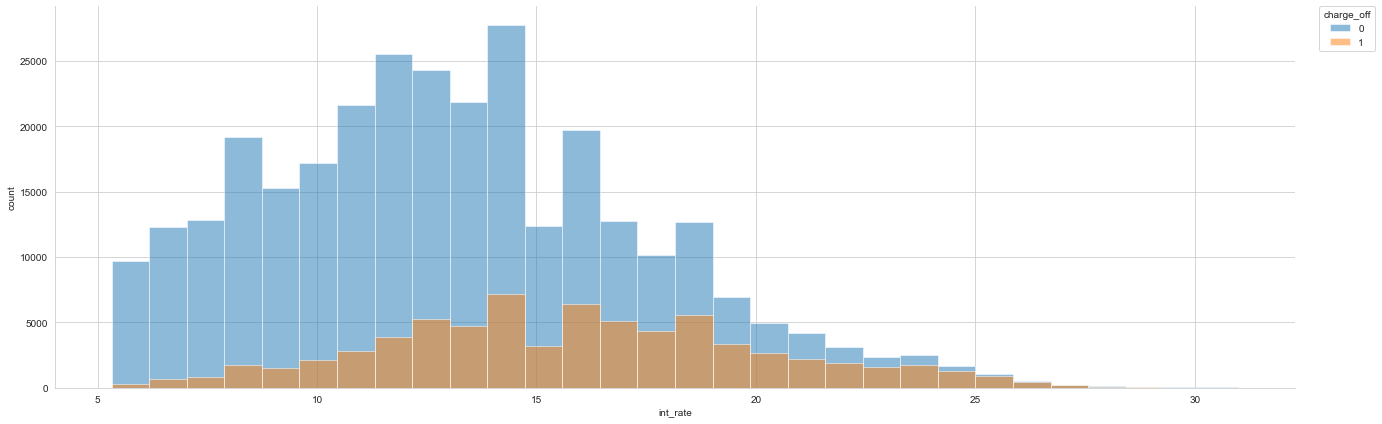

In [138]:
g = sns.FacetGrid(data = df,hue = 'charge_off',height=6,aspect=3)
g = g.map(plt.hist,"int_rate",alpha = 0.5,bins = 30)
plt.legend(title = 'charge_off', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('count')
plt.show()

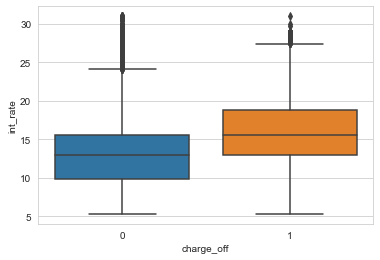

In [139]:
sns.boxplot(x = 'charge_off', y = 'int_rate', data = df)
plt.show()

'charge_off' vs 'installment':

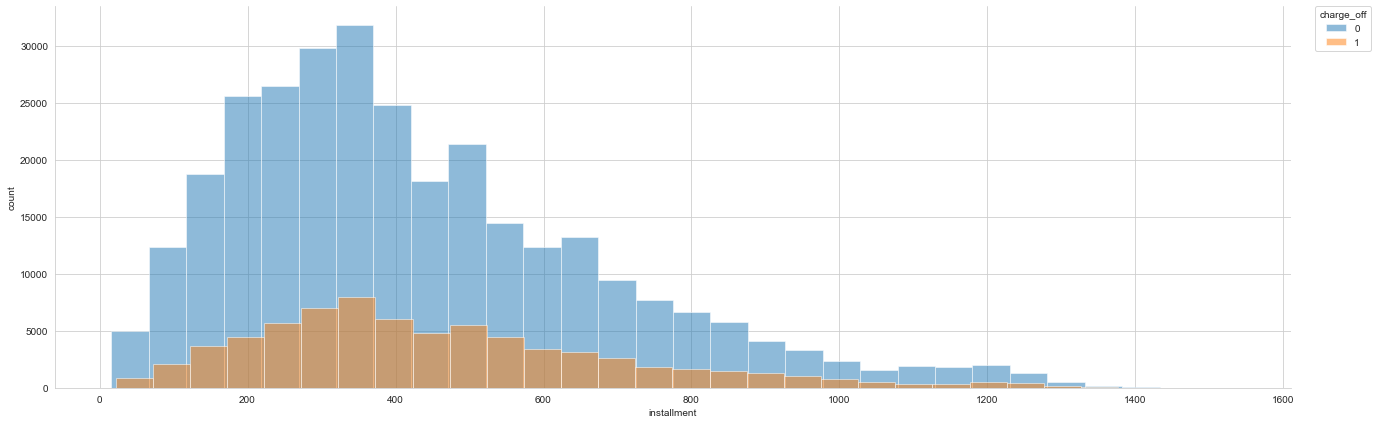

In [140]:
g = sns.FacetGrid(data = df,hue = 'charge_off',height=6,aspect=3)
g = g.map(plt.hist,"installment",alpha = 0.5,bins = 30)
plt.legend(title = 'charge_off', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('count')
plt.show()

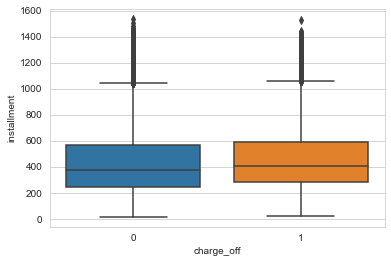

In [141]:
sns.boxplot(x = 'charge_off', y = 'installment', data = df)
plt.show()

'charge_off' vs 'sub_grade':

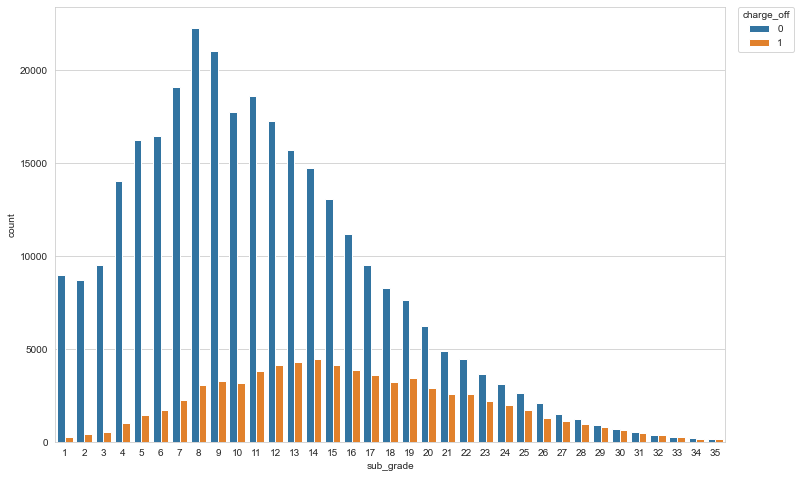

In [142]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'sub_grade', data = df, hue = 'charge_off',order = list(np.sort(df['sub_grade'].unique())))
plt.legend(title = 'charge_off', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [143]:
# Calculate the charge off rate of each sub_grade group:

In [144]:
np.sort(df['sub_grade'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35], dtype=int64)

In [145]:
df.groupby('sub_grade').count()['charge_off']

sub_grade
1      9215
2      9103
3     10055
4     15064
5     17737
6     18179
7     21387
8     25349
9     24361
10    20897
11    22415
12    21409
13    20045
14    19171
15    17221
16    15069
17    13141
18    11497
19    11032
20     9117
21     7482
22     7052
23     5869
24     5093
25     4339
26     3353
27     2618
28     2177
29     1709
30     1332
31     1007
32      717
33      524
34      355
35      298
Name: charge_off, dtype: int64

In [146]:
df[df['charge_off'] == 1].groupby('sub_grade').count()['charge_off']

sub_grade
1      244
2      413
3      542
4     1025
5     1460
6     1724
7     2256
8     3043
9     3301
10    3151
11    3788
12    4123
13    4317
14    4451
15    4133
16    3888
17    3608
18    3225
19    3418
20    2879
21    2572
22    2569
23    2218
24    1990
25    1731
26    1282
27    1115
28     939
29     781
30     646
31     460
32     346
33     262
34     156
35     154
Name: charge_off, dtype: int64

In [147]:
pd.DataFrame(
             {'sub_grade':np.sort(df['sub_grade'].unique()),
              'charge_off_rate': list(df[df['charge_off'] == 1].groupby('sub_grade').count()['charge_off'] /
              df.groupby('sub_grade').count()['charge_off'])}
            )

,sub_grade,charge_off_rate
0,1,0.026479
1,2,0.045370
2,3,0.053904
3,4,0.068043
4,5,0.082314
5,6,0.094835
6,7,0.105485
7,8,0.120044
8,9,0.135503
9,10,0.150787


'charge_off' vs 'emp_length':

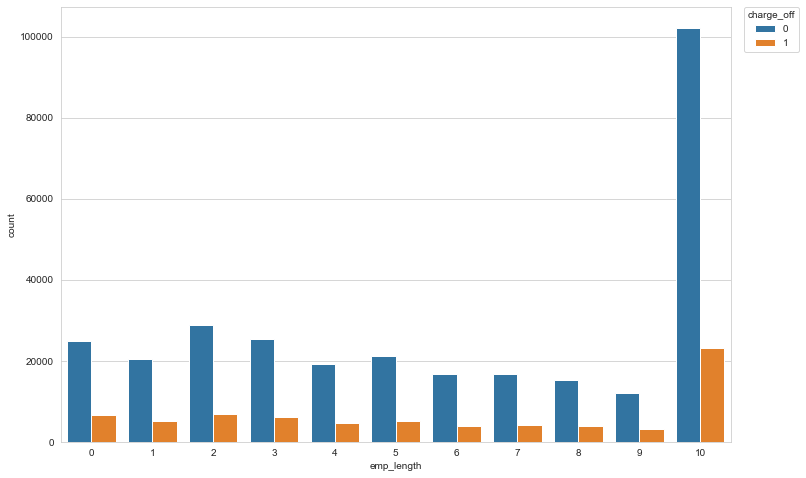

In [148]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'emp_length', data = df, hue = 'charge_off')
plt.legend(title = 'charge_off', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [149]:
# Calculate the charge off rate of each emp_length group:

In [150]:
np.sort(df['emp_length'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [151]:
df.groupby('emp_length').count()['charge_off']

emp_length
0      31489
1      25637
2      35597
3      31469
4      23811
5      26353
6      20750
7      20727
8      19071
9      15215
10    125270
Name: charge_off, dtype: int64

In [152]:
df[df['charge_off'] == 1].groupby('emp_length').count()['charge_off']

emp_length
0      6521
1      5112
2      6886
3      6144
4      4571
5      5067
6      3927
7      4039
8      3813
9      3053
10    23077
Name: charge_off, dtype: int64

In [153]:
pd.DataFrame(
             {'emp_length':np.sort(df['emp_length'].unique()),
              'charge_off_rate': list(df[df['charge_off'] == 1].groupby('emp_length').count()['charge_off'] /
              df.groupby('emp_length').count()['charge_off'])}
            )

,emp_length,charge_off_rate
0,0,0.207088
1,1,0.199399
2,2,0.193443
3,3,0.195240
4,4,0.191970
5,5,0.192274
6,6,0.189253
7,7,0.194867
8,8,0.199937
9,9,0.200657


'charge_off' vs 'home_ownership':

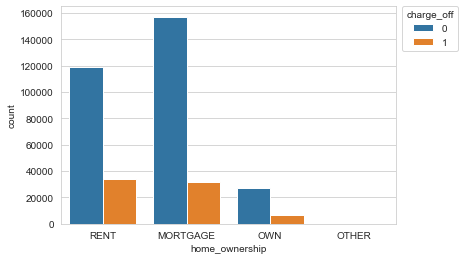

In [154]:
sns.countplot(x = 'home_ownership', data = df, hue = 'charge_off')
plt.legend(title = 'charge_off', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [155]:
# Calculate the charge off rate of each home_ownership group:

In [156]:
np.sort(df['home_ownership'].unique())

array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object)

In [157]:
df.groupby('home_ownership').count()['charge_off']

home_ownership
MORTGAGE    188645
OTHER          138
OWN          34095
RENT        152511
Name: charge_off, dtype: int64

In [158]:
df[df['charge_off'] == 1].groupby('home_ownership').count()['charge_off']

home_ownership
MORTGAGE    31477
OTHER          22
OWN          6826
RENT        33885
Name: charge_off, dtype: int64

In [159]:
pd.DataFrame(
             {'home_ownership':np.sort(df['home_ownership'].unique()),
              'charge_off_rate': list(df[df['charge_off'] == 1].groupby('home_ownership').count()['charge_off'] /
              df.groupby('home_ownership').count()['charge_off'])}
            )

,home_ownership,charge_off_rate
0,MORTGAGE,0.166858
1,OTHER,0.159420
2,OWN,0.200205
3,RENT,0.222181


'charge_off' vs 'annual_inc':

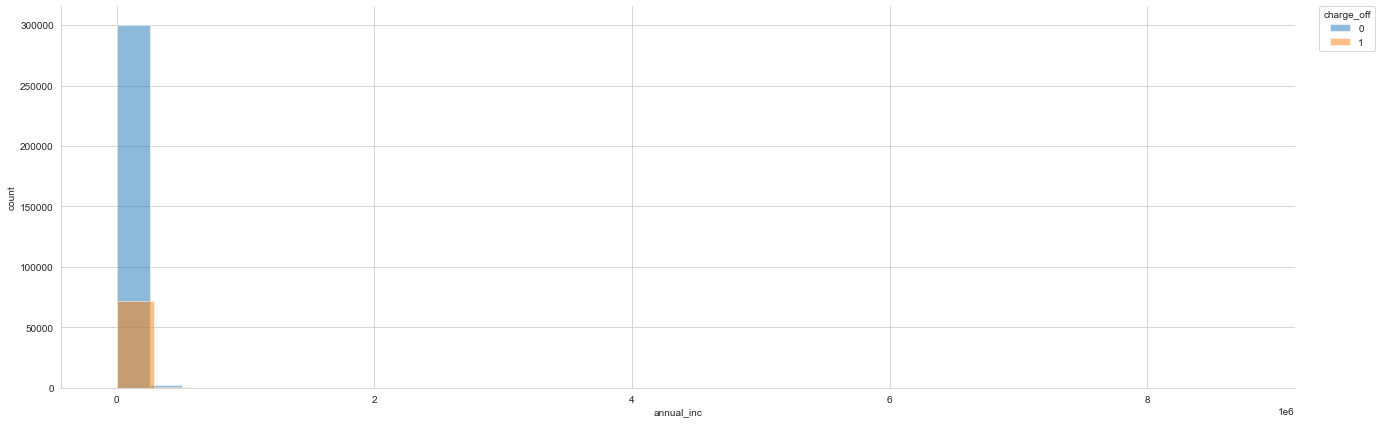

In [160]:
g = sns.FacetGrid(data = df,hue = 'charge_off',height=6,aspect=3)
g = g.map(plt.hist,"annual_inc",alpha = 0.5,bins = 30)
plt.legend(title = 'charge_off', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('count')
plt.show()

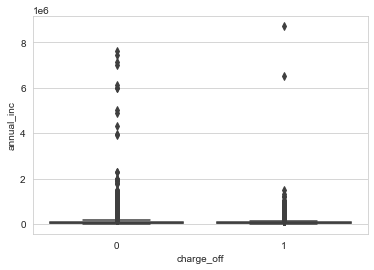

In [161]:
sns.boxplot(x = 'charge_off', y = 'annual_inc', data = df)
plt.show()

'charge_off' vs 'verification_status':

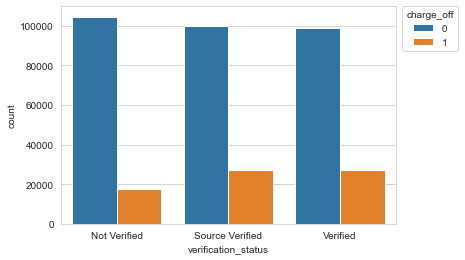

In [162]:
sns.countplot(x = 'verification_status', data = df, hue = 'charge_off')
plt.legend(title = 'charge_off', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [163]:
# Calculate the charge off rate of each verification_status group:

In [164]:
np.sort(df['verification_status'].unique())

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [165]:
df.groupby('verification_status').count()['charge_off']

verification_status
Not Verified       122312
Source Verified    127001
Verified           126076
Name: charge_off, dtype: int64

In [166]:
df[df['charge_off'] == 1].groupby('verification_status').count()['charge_off']

verification_status
Not Verified       17777
Source Verified    27199
Verified           27234
Name: charge_off, dtype: int64

In [167]:
pd.DataFrame(
             {'verification_status':np.sort(df['verification_status'].unique()),
              'charge_off_rate': list(df[df['charge_off'] == 1].groupby('verification_status').count()['charge_off'] /
              df.groupby('verification_status').count()['charge_off'])}
            )

,verification_status,charge_off_rate
0,Not Verified,0.145341
1,Source Verified,0.214164
2,Verified,0.216013


'charge_off' vs 'purpose':

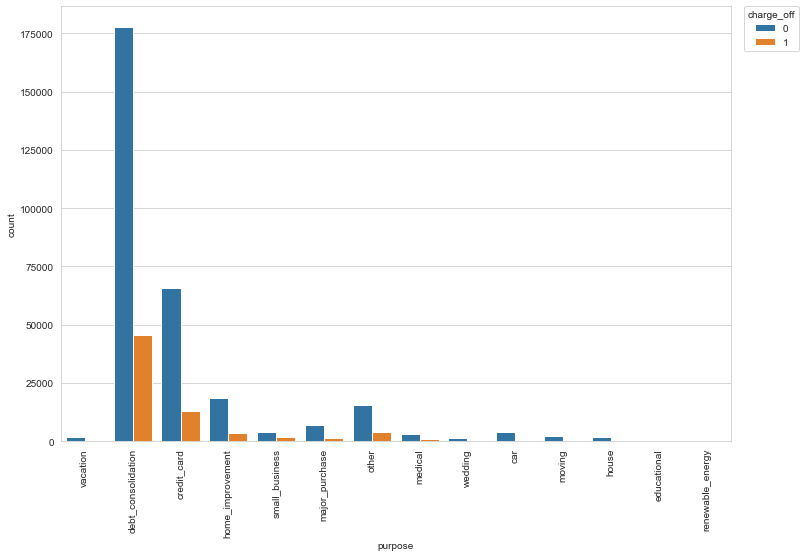

In [168]:
plt.figure(figsize = (12,8))
plot = sns.countplot(x = 'purpose', data = df, hue = 'charge_off')
plt.legend(title = 'charge_off', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

In [169]:
# Calculate the charge off rate of each purpose group:

In [170]:
np.sort(df['purpose'].unique())

array(['car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding'], dtype=object)

In [171]:
df.groupby('purpose').count()['charge_off']

purpose
car                     4444
credit_card            78481
debt_consolidation    223267
educational              239
home_improvement       22456
house                   2104
major_purchase          8291
medical                 3863
moving                  2680
other                  19740
renewable_energy         308
small_business          5476
vacation                2272
wedding                 1768
Name: charge_off, dtype: int64

In [172]:
df[df['charge_off'] == 1].groupby('purpose').count()['charge_off']

purpose
car                     584
credit_card           12757
debt_consolidation    45545
educational              38
home_improvement       3716
house                   418
major_purchase         1335
medical                 806
moving                  611
other                  4103
renewable_energy         72
small_business         1599
vacation                417
wedding                 209
Name: charge_off, dtype: int64

In [173]:
pd.DataFrame(
             {'purpose':np.sort(df['purpose'].unique()),
              'charge_off_rate': list(df[df['charge_off'] == 1].groupby('purpose').count()['charge_off'] /
              df.groupby('purpose').count()['charge_off'])}
            )

,purpose,charge_off_rate
0,car,0.131413
1,credit_card,0.162549
2,debt_consolidation,0.203993
3,educational,0.158996
4,home_improvement,0.165479
5,house,0.198669
6,major_purchase,0.161018
7,medical,0.208646
8,moving,0.227985
9,other,0.207852


'charge_off' vs 'dti':

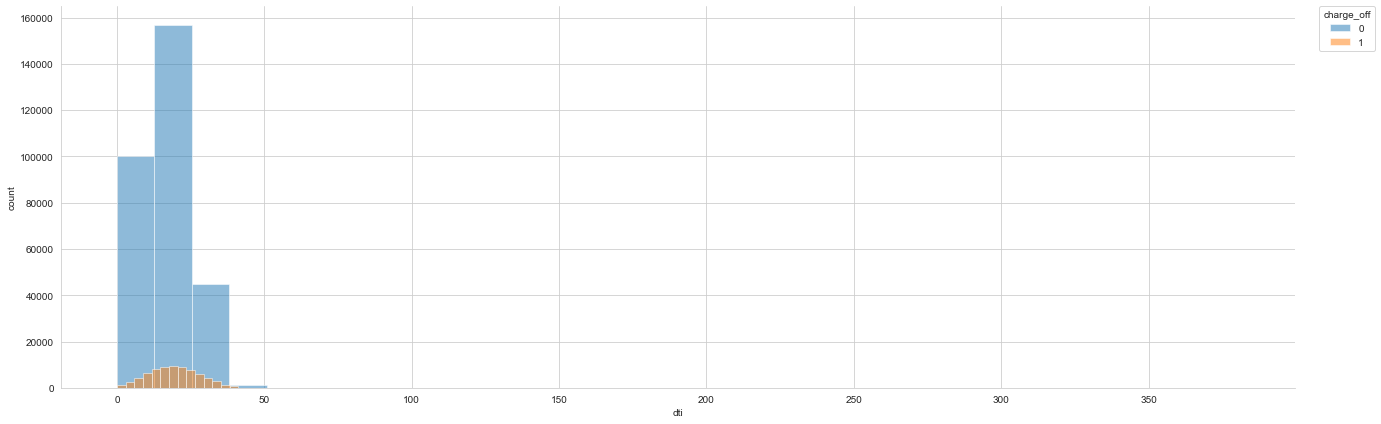

In [174]:
g = sns.FacetGrid(data = df,hue = 'charge_off',height=6,aspect=3)
g = g.map(plt.hist,"dti",alpha = 0.5,bins = 30)
plt.legend(title = 'charge_off', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('count')
plt.show()

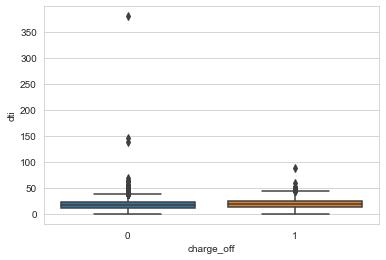

In [175]:
sns.boxplot(x = 'charge_off', y = 'dti', data = df)
plt.show()

'charge_off' vs 'earliest_cr_line_year':

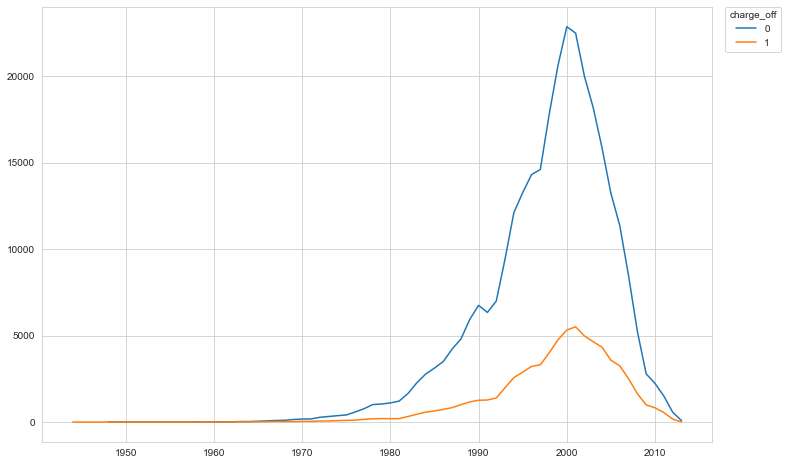

In [176]:
plt.figure(figsize = (12,8))
plt.plot(df[df['charge_off'] == 0]['earliest_cr_line_year'].value_counts().sort_index())
plt.plot(df[df['charge_off'] == 1]['earliest_cr_line_year'].value_counts().sort_index())
plt.legend([0,1], title = 'charge_off', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

'charge_off' vs 'open_acc':

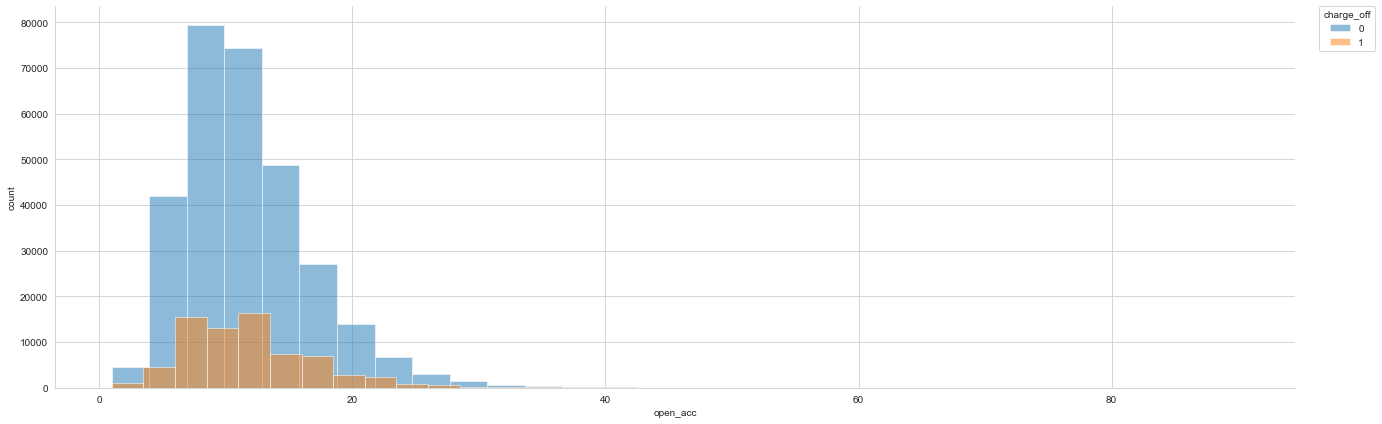

In [177]:
g = sns.FacetGrid(data = df,hue = 'charge_off',height=6,aspect=3)
g = g.map(plt.hist,"open_acc",alpha = 0.5,bins = 30)
plt.legend(title = 'charge_off', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('count')
plt.show()

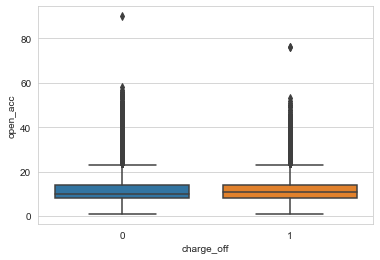

In [178]:
sns.boxplot(x = 'charge_off', y = 'open_acc', data = df)
plt.show()

'charge_off' vs 'pub_rec':

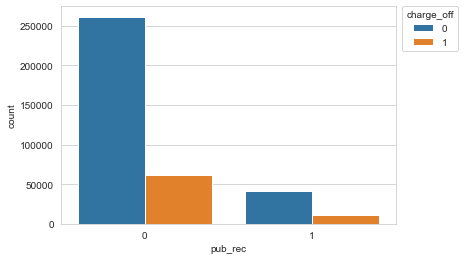

In [179]:
sns.countplot(x = 'pub_rec', data = df, hue = 'charge_off')
plt.legend(title = 'charge_off', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [180]:
# Calculate the charge off rate of each pub_rec group:

In [181]:
np.sort(df['pub_rec'].unique())

array([0, 1], dtype=int64)

In [182]:
df.groupby('pub_rec').count()['charge_off']

pub_rec
0    322446
1     52943
Name: charge_off, dtype: int64

In [183]:
df[df['charge_off'] == 1].groupby('pub_rec').count()['charge_off']

pub_rec
0    61210
1    11000
Name: charge_off, dtype: int64

In [184]:
pd.DataFrame(
             {'pub_rec':np.sort(df['pub_rec'].unique()),
              'charge_off_rate': list(df[df['charge_off'] == 1].groupby('pub_rec').count()['charge_off'] /
              df.groupby('pub_rec').count()['charge_off'])}
            )

,pub_rec,charge_off_rate
0,0,0.189830
1,1,0.207771


'charge_off' vs 'revol_bal':

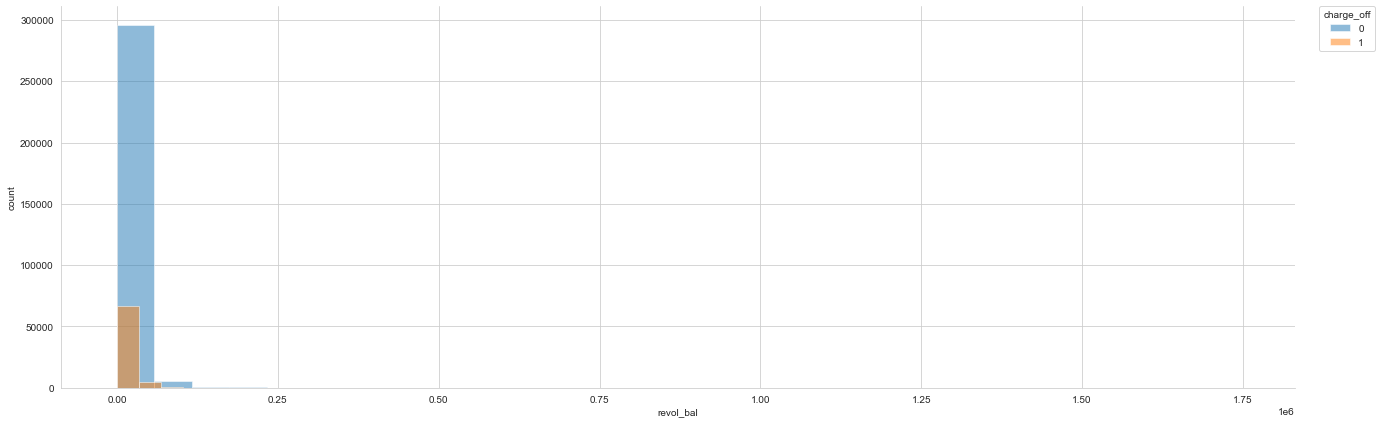

In [185]:
g = sns.FacetGrid(data = df,hue = 'charge_off',height=6,aspect=3)
g = g.map(plt.hist,"revol_bal",alpha = 0.5,bins = 30)
plt.legend(title = 'charge_off', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('count')
plt.show()

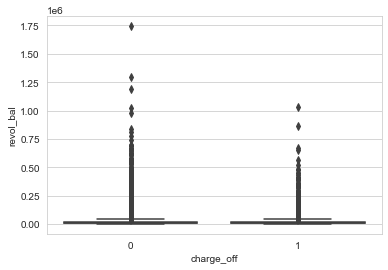

In [186]:
sns.boxplot(x = 'charge_off', y = 'revol_bal', data = df)
plt.show()

'charge_off' vs 'revol_util':

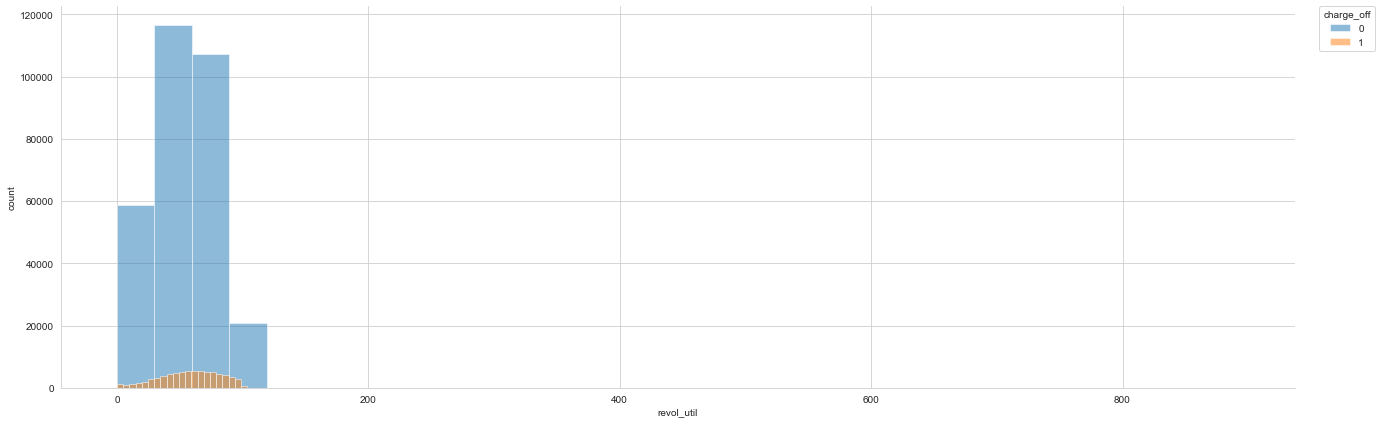

In [187]:
g = sns.FacetGrid(data = df,hue = 'charge_off',height=6,aspect=3)
g = g.map(plt.hist,"revol_util",alpha = 0.5,bins = 30)
plt.legend(title = 'charge_off', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('count')
plt.show()

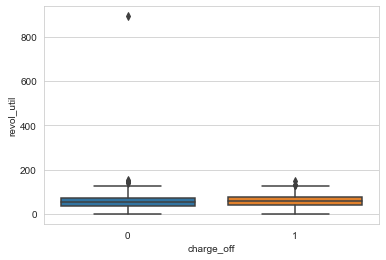

In [188]:
sns.boxplot(x = 'charge_off', y = 'revol_util', data = df)
plt.show()

'charge_off' vs 'total_acc':

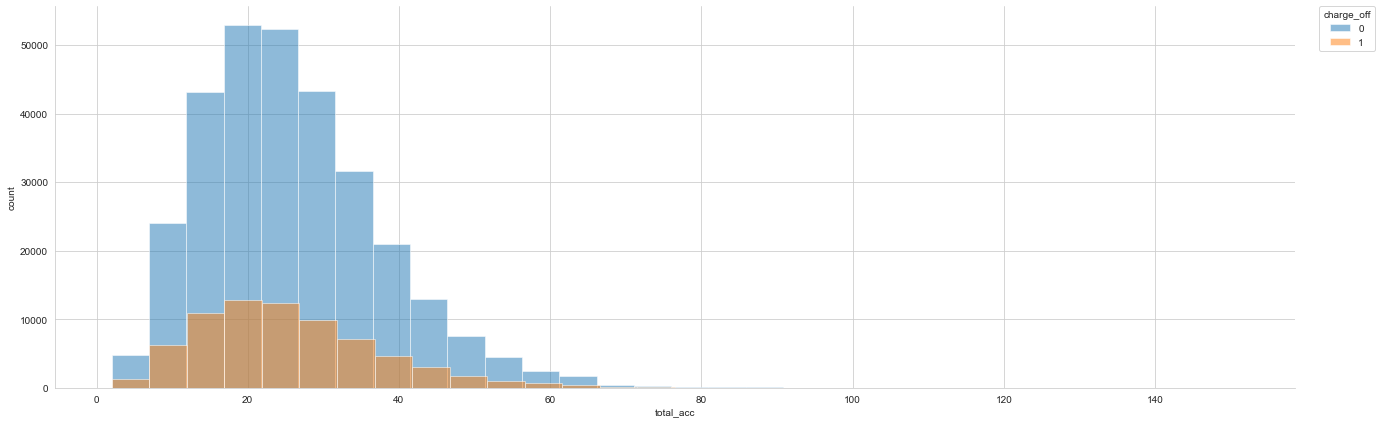

In [189]:
g = sns.FacetGrid(data = df,hue = 'charge_off',height=6,aspect=3)
g = g.map(plt.hist,"total_acc",alpha = 0.5,bins = 30)
plt.legend(title = 'charge_off', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('count')
plt.show()

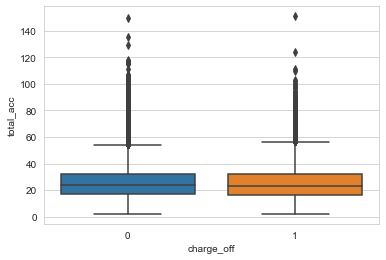

In [190]:
sns.boxplot(x = 'charge_off', y = 'total_acc', data = df)
plt.show()

'charge_off' vs 'initial_list_status':

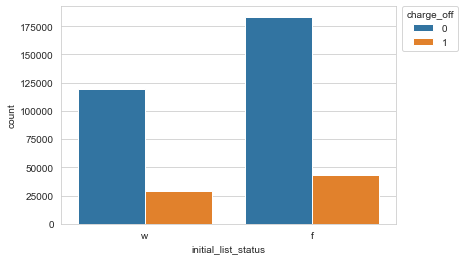

In [191]:
sns.countplot(x = 'initial_list_status', data = df, hue = 'charge_off')
plt.legend(title = 'charge_off', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [192]:
# Calculate the charge off rate of each initial_list_status group:

In [193]:
np.sort(df['initial_list_status'].unique())

array(['f', 'w'], dtype=object)

In [194]:
df.groupby('initial_list_status').count()['charge_off']

initial_list_status
f    226244
w    149145
Name: charge_off, dtype: int64

In [195]:
df[df['charge_off'] == 1].groupby('initial_list_status').count()['charge_off']

initial_list_status
f    42820
w    29390
Name: charge_off, dtype: int64

In [196]:
pd.DataFrame(
             {'initial_list_status':np.sort(df['initial_list_status'].unique()),
              'charge_off_rate': list(df[df['charge_off'] == 1].groupby('initial_list_status').count()['charge_off'] /
              df.groupby('initial_list_status').count()['charge_off'])}
            )

,initial_list_status,charge_off_rate
0,f,0.189265
1,w,0.197057


'charge_off' vs 'mort_acc':

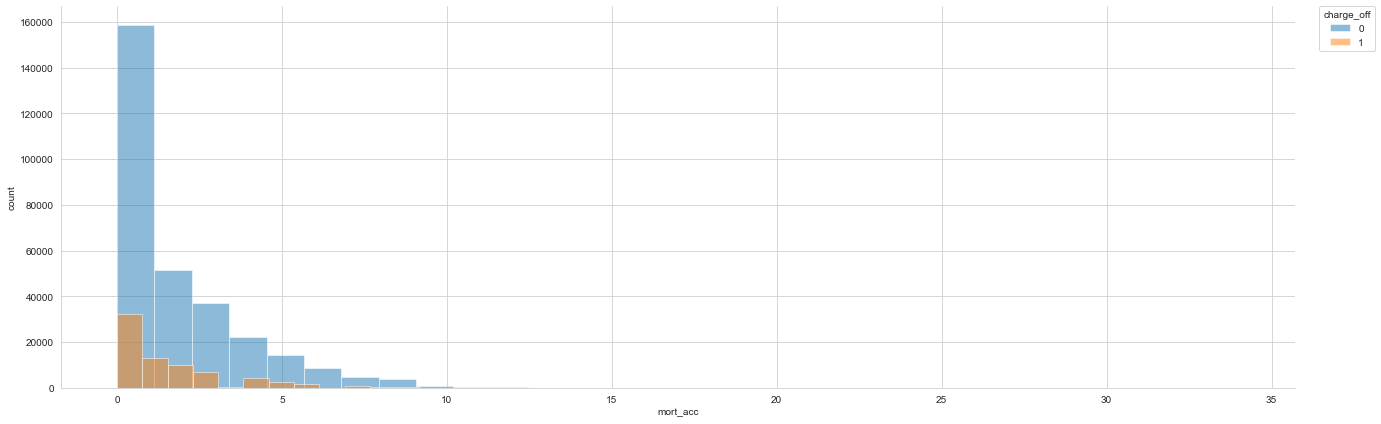

In [197]:
g = sns.FacetGrid(data = df,hue = 'charge_off',height=6,aspect=3)
g = g.map(plt.hist,"mort_acc",alpha = 0.5,bins = 30)
plt.legend(title = 'charge_off', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('count')
plt.show()

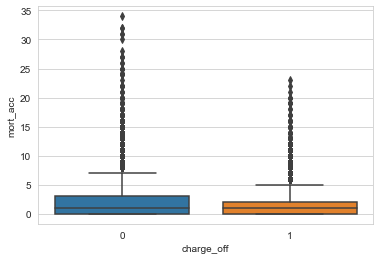

In [198]:
sns.boxplot(x = 'charge_off', y = 'mort_acc', data = df)
plt.show()

'charge_off' vs 'pub_rec_bankruptcies':

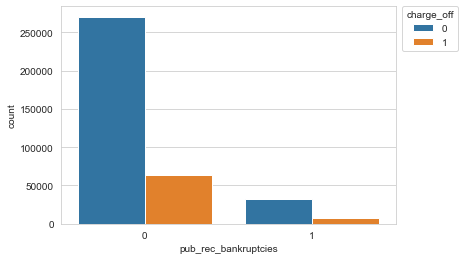

In [199]:
sns.countplot(x = 'pub_rec_bankruptcies', data = df, hue = 'charge_off')
plt.legend(title = 'charge_off', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [200]:
# Calculate the charge off rate of each pub_rec_bankruptcies group:

In [201]:
np.sort(df['pub_rec_bankruptcies'].unique())

array([0, 1], dtype=int64)

In [202]:
df.groupby('pub_rec_bankruptcies').count()['charge_off']

pub_rec_bankruptcies
0    334220
1     41169
Name: charge_off, dtype: int64

In [203]:
df[df['charge_off'] == 1].groupby('pub_rec_bankruptcies').count()['charge_off']

pub_rec_bankruptcies
0    63999
1     8211
Name: charge_off, dtype: int64

In [204]:
pd.DataFrame(
             {'pub_rec_bankruptcies':np.sort(df['pub_rec_bankruptcies'].unique()),
              'charge_off_rate': list(df[df['charge_off'] == 1].groupby('pub_rec_bankruptcies').count()['charge_off'] /
              df.groupby('pub_rec_bankruptcies').count()['charge_off'])}
            )

,pub_rec_bankruptcies,charge_off_rate
0,0,0.191488
1,1,0.199446


'charge_off' vs 'zip_code':

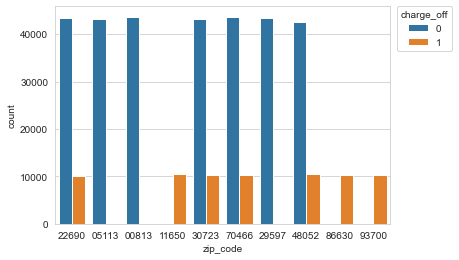

In [205]:
sns.countplot(x = 'zip_code', data = df, hue = 'charge_off')
plt.legend(title = 'charge_off', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [206]:
# Calculate the charge off rate of each zip code group:

In [207]:
np.sort(df['zip_code'].unique())

array(['00813', '05113', '11650', '22690', '29597', '30723', '48052',
       '70466', '86630', '93700'], dtype=object)

In [208]:
df.groupby('zip_code').count()['charge_off']

zip_code
00813    43618
05113    43222
11650    10433
22690    53555
29597    43343
30723    53554
48052    53044
70466    53996
86630    10245
93700    10379
Name: charge_off, dtype: int64

In [209]:
df[df['charge_off'] == 1].groupby('zip_code').count()['charge_off']

zip_code
11650    10433
22690    10163
30723    10268
48052    10401
70466    10321
86630    10245
93700    10379
Name: charge_off, dtype: int64

In [210]:
pd.DataFrame(
             {'zip_code':np.sort(df['zip_code'].unique()),
              'charge_off_rate': list(df[df['charge_off'] == 1].groupby('zip_code').count()['charge_off'] /
              df.groupby('zip_code').count()['charge_off'])}
            )

,zip_code,charge_off_rate
0,00813,NaN
1,05113,NaN
2,11650,1.000000
3,22690,0.189768
4,29597,NaN
5,30723,0.191732
6,48052,0.196082
7,70466,0.191144
8,86630,1.000000
9,93700,1.000000


# Observations from Exploratory Data Analysis

Below are some observations found from the exploratory data analysis:

1. Very strong correlation between 'installment' and 'loan_amnt'.

2. Distributions of 'installment' and 'sub_grade' are right-skewed.

3. '10+ years' group from 'emp_length' has the highest count, much higher than any other groups.

4. Extreme outliers are observed in the following columns: 'annual_inc', 'dti', 'earliest_cr_line_year', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc'. We will remove those top/bottom 1% in order to remove those noise data.

5. The target column 'charge_off' is not balanced. This implies that 'accuracy' may not be an appropriate metric for model evaluation. For model evaluation of this project we will use area under curve (AUC) of receiver operating characteristic curve (ROC).

6. 'application_type' column has no predictive power since its majority is 'INDIVIDUAL' and this column will be useless for predicting 'charge_off'.

7. Charge off rates of all groups from 'emp_length' are very similar. This may hint that this column may not be useful for predicting 'charge_off'.

8. Charge off rates of all groups from 'initial_list_status' are very similar. This may hint that this column may not be useful for predicting 'charge_off'.

9. Charge off rates of all groups from 'pub_rec_bankruptcies' are very similar. This may hint that this column may not be useful for predicting 'charge_off'.

10. Charge off rate of term 60 months is much higher than term 36 months.

11. 'small business' has the highest charge off rate for 'purpose'.

12. 3 groups of 'verification_status' are almost uniformly distributed. This may hint that this column may not be useful for predicting 'charge_off'.

13. Those who did charge_off had higher median loan_amnt than those who did not.

14. Those who did charge_off had higher median int_rate than those who did not.

15. Those groups with bad subgrades (F5 or worse), their charge off rates are almost 50%.

16. There are quite a number of people who had annual income of more than 1 million had charge off record (max loan amount is 40,000).

17. It is surprising to see there are 0% and 100% charge off rates for some zip codes.

# Data Cleansing

Determine the threshold for 'annual_inc':

In [211]:
# Specify the top percentage to remove
top_percent_to_remove = 1

# Calculate the (100 - top_percent_to_remove)th percentile of 'annual_inc'
annual_inc_threshold = df['annual_inc'].quantile(1 - (top_percent_to_remove/100))
annual_inc_threshold

250000.0

Determine the threshold for 'dti':

In [212]:
# Specify the top percentage to remove
top_percent_to_remove = 1

# Calculate the (100 - top_percent_to_remove)th percentile of 'dti'
dti_threshold = df['dti'].quantile(1 - (top_percent_to_remove/100))
dti_threshold

36.27

Determine the threshold for 'earliest_cr_line_year':

In [213]:
# Specify the bottom percentage to remove
bottom_percent_to_remove = 1

# Calculate the (bottom_percent_to_remove)th percentile of 'earliest_cr_line_year'
earliest_cr_line_year_threshold = df['earliest_cr_line_year'].quantile(bottom_percent_to_remove/100)
earliest_cr_line_year_threshold

1977.0

Determine the threshold for 'open_acc':

In [214]:
# Specify the top percentage to remove
top_percent_to_remove = 1

# Calculate the (100 - top_percent_to_remove)th percentile of 'open_acc'
open_acc_threshold = df['open_acc'].quantile(1 - (top_percent_to_remove/100))
open_acc_threshold

27.0

Determine the threshold for 'revol_bal':

In [215]:
# Specify the top percentage to remove
top_percent_to_remove = 1

# Calculate the (100 - top_percent_to_remove)th percentile of 'revol_bal'
revol_bal_threshold = df['revol_bal'].quantile(1 - (top_percent_to_remove/100))
revol_bal_threshold

86345.35999999999

Determine the threshold for 'revol_util':

In [216]:
# Specify the top percentage to remove
top_percent_to_remove = 1

# Calculate the (100 - top_percent_to_remove)th percentile of 'revol_util'
revol_util_threshold = df['revol_util'].quantile(1 - (top_percent_to_remove/100))
revol_util_threshold

98.0

Determine the threshold for 'total_acc':

In [217]:
# Specify the top percentage to remove
top_percent_to_remove = 1

# Calculate the (100 - top_percent_to_remove)th percentile of 'total_acc'
total_acc_threshold = df['total_acc'].quantile(1 - (top_percent_to_remove/100))
total_acc_threshold

60.0

Determine the threshold for 'mort_acc':

In [218]:
# Specify the top percentage to remove
top_percent_to_remove = 1

# Calculate the (100 - top_percent_to_remove)th percentile of 'mort_acc'
mort_acc_threshold = df['mort_acc'].quantile(1 - (top_percent_to_remove/100))
mort_acc_threshold

8.0

Keep only those rows within the thresholds:

In [219]:
# 1.'annual_inc' less than annual_inc_threshold
# 2.'dti' less than dti_threshold
# 3.'earliest_cr_line_year' larger than earliest_cr_line_year_threshold
# 4.'open_acc' less than open_acc_threshold
# 5.'revol_bal' less than revol_bal_threshold
# 6.'revol_util' less than revol_util_threshold
# 7.'total_acc' less than total_acc_threshold
# 8.'mort_acc' less than mort_acc_threshold

df = df[(df['annual_inc'] < annual_inc_threshold) &
        (df['dti'] < dti_threshold) & 
        (df['earliest_cr_line_year'] > earliest_cr_line_year_threshold) &
        (df['open_acc'] < open_acc_threshold) &
        (df['revol_bal'] < revol_bal_threshold) &
        (df['revol_util'] < revol_util_threshold) & 
        (df['total_acc'] < total_acc_threshold) &
        (df['mort_acc'] < mort_acc_threshold)]

Remove any duplicate rows:

In [220]:
df.drop_duplicates(keep = 'first', inplace=True)

C:\Users\jacks\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [221]:
df.shape

(344298, 22)

Since we have removed some rows, we have to reset the index of df. Otherwise there may be problematic when we try to fit the data to models later.

In [222]:
df = df.reset_index(drop=True)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344298 entries, 0 to 344297
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              344298 non-null  float64
 1   term                   344298 non-null  int64  
 2   int_rate               344298 non-null  float64
 3   installment            344298 non-null  float64
 4   sub_grade              344298 non-null  int64  
 5   emp_length             344298 non-null  int64  
 6   home_ownership         344298 non-null  object 
 7   annual_inc             344298 non-null  float64
 8   verification_status    344298 non-null  object 
 9   purpose                344298 non-null  object 
 10  dti                    344298 non-null  float64
 11  open_acc               344298 non-null  float64
 12  pub_rec                344298 non-null  int64  
 13  revol_bal              344298 non-null  float64
 14  revol_util             344298 non-nu

In [224]:
df.index

RangeIndex(start=0, stop=344298, step=1)

In [225]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,charge_off,earliest_cr_line_year,zip_code
0,10000.0,36,11.44,329.48,9,10,RENT,117000.0,Not Verified,vacation,26.24,16.0,0,36369.0,41.8,25.0,w,0.0,0,0,1990,22690
1,8000.0,36,11.99,265.68,10,4,MORTGAGE,65000.0,Not Verified,debt_consolidation,22.05,17.0,0,20131.0,53.3,27.0,f,3.0,0,0,2004,05113
2,15600.0,36,10.49,506.97,8,0,RENT,43057.0,Source Verified,credit_card,12.79,13.0,0,11987.0,92.2,26.0,f,0.0,0,0,2007,05113
3,7200.0,36,6.49,220.65,2,6,RENT,54000.0,Not Verified,credit_card,2.60,6.0,0,5472.0,21.5,13.0,f,0.0,0,0,2006,00813
4,24375.0,60,17.27,609.33,15,9,MORTGAGE,55000.0,Verified,credit_card,33.95,13.0,0,24584.0,69.8,43.0,f,1.0,0,1,1999,11650


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344298 entries, 0 to 344297
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              344298 non-null  float64
 1   term                   344298 non-null  int64  
 2   int_rate               344298 non-null  float64
 3   installment            344298 non-null  float64
 4   sub_grade              344298 non-null  int64  
 5   emp_length             344298 non-null  int64  
 6   home_ownership         344298 non-null  object 
 7   annual_inc             344298 non-null  float64
 8   verification_status    344298 non-null  object 
 9   purpose                344298 non-null  object 
 10  dti                    344298 non-null  float64
 11  open_acc               344298 non-null  float64
 12  pub_rec                344298 non-null  int64  
 13  revol_bal              344298 non-null  float64
 14  revol_util             344298 non-nu

In [227]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,344298.0,13941.353638,8165.524816,500.00,8000.00,12000.00,19200.00,40000.00
term,344298.0,41.687120,10.205285,36.00,36.00,36.00,36.00,60.00
int_rate,344298.0,13.596669,4.444244,5.32,10.38,13.33,16.29,30.99
installment,344298.0,426.402617,244.249480,16.08,250.33,373.22,557.69,1503.85
sub_grade,344298.0,11.983909,6.547795,1.00,7.00,11.00,16.00,35.00
emp_length,344298.0,5.894458,3.637745,0.00,3.00,6.00,10.00,10.00
annual_inc,344298.0,70766.655157,35257.142680,4000.00,45000.00,63000.00,87000.00,249999.96
dti,344298.0,17.065478,7.801318,0.00,11.23,16.73,22.62,36.26
open_acc,344298.0,11.014929,4.570089,1.00,8.00,10.00,14.00,26.00
pub_rec,344298.0,0.142017,0.349068,0.00,0.00,0.00,0.00,1.00


Check again all the visualization after data cleansing

Column 'annual_inc':

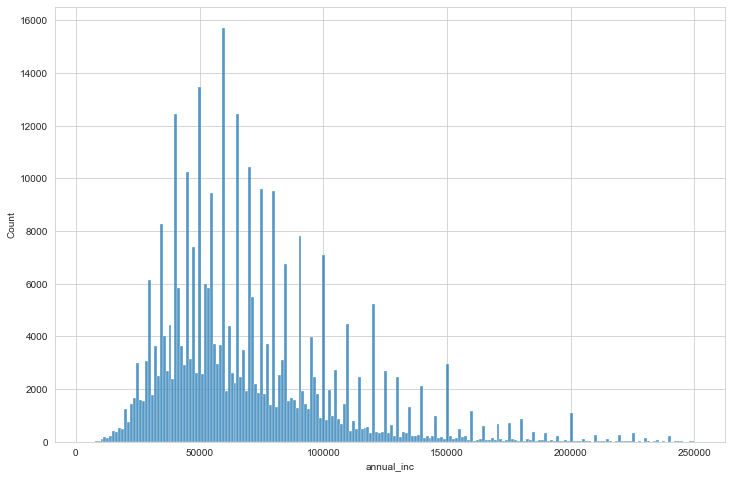

In [228]:
plt.figure(figsize = (12,8))
sns.histplot(x = 'annual_inc', data = df)
plt.show()

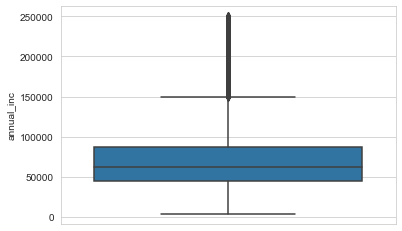

In [229]:
sns.boxplot(y = 'annual_inc', data = df)
plt.show()

Column 'dti':

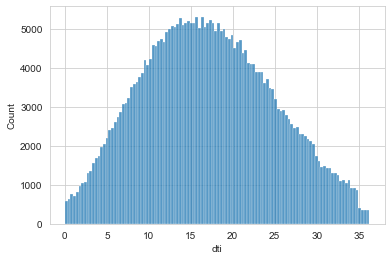

In [230]:
sns.histplot(x = 'dti', data = df)
plt.show()

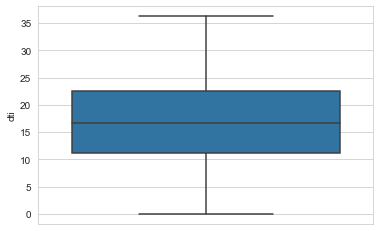

In [231]:
sns.boxplot(y = 'dti', data = df)
plt.show()

Column 'earliest_cr_line_year':

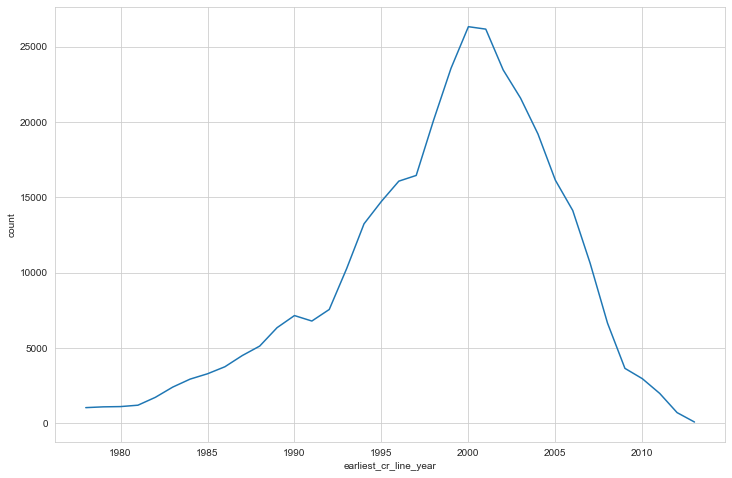

In [232]:
plt.figure(figsize = (12,8))
plt.plot(df['earliest_cr_line_year'].value_counts().sort_index())
plt.xlabel('earliest_cr_line_year')
plt.ylabel('count')
plt.show()

Column 'open_acc':

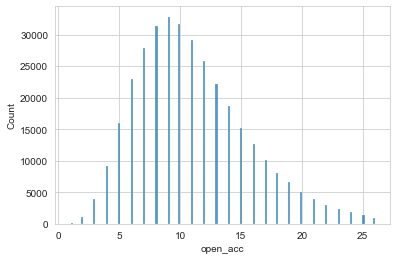

In [233]:
sns.histplot(x = 'open_acc', data = df)
plt.show()

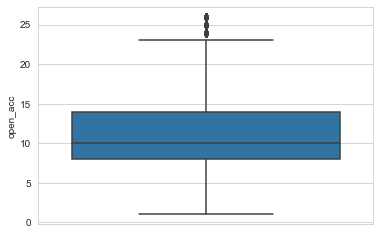

In [234]:
sns.boxplot(y = 'open_acc', data = df)
plt.show()

Column 'revol_bal':

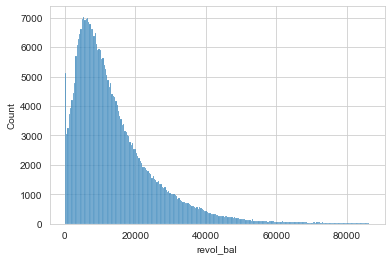

In [235]:
sns.histplot(x = 'revol_bal', data = df)
plt.show()

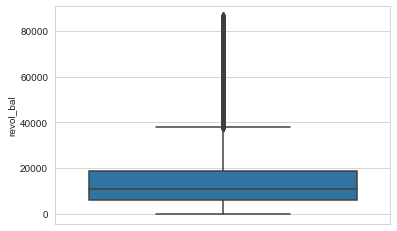

In [236]:
sns.boxplot(y = 'revol_bal', data = df)
plt.show()

Column 'revol_util':

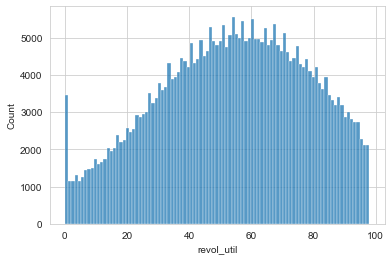

In [237]:
sns.histplot(x = 'revol_util', data = df)
plt.show()

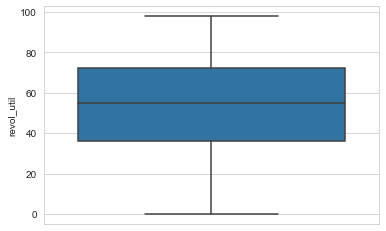

In [238]:
sns.boxplot(y = 'revol_util', data = df)
plt.show()

Column 'total_acc':

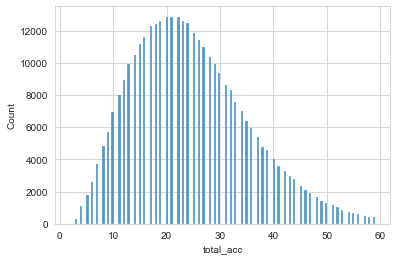

In [239]:
sns.histplot(x = 'total_acc', data = df)
plt.show()

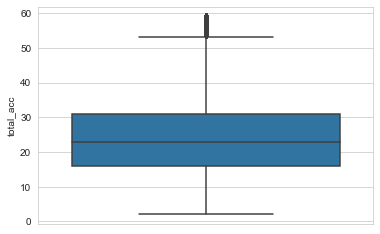

In [240]:
sns.boxplot(y = 'total_acc', data = df)
plt.show()

Column 'mort_acc':

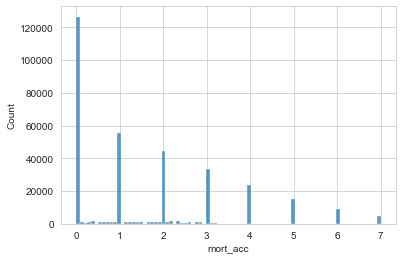

In [241]:
sns.histplot(x = 'mort_acc', data = df)
plt.show()

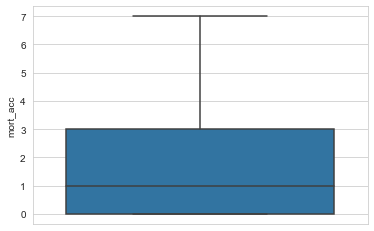

In [242]:
sns.boxplot(y = 'mort_acc', data = df)
plt.show()

# Handling Categorical Variables

Dummy variables for categorical variables will be created. It shall be noted that the first dummy column of each categorical variable shall be dropped to avoid perfect multicollinearity (Dummy Variable Trap).

We will use pandas get_dummies() method for creating dummy variables. We will set drop_first = True to drop the first dummy column of each categorical variable.

In [243]:
df = pd.get_dummies(data = df, drop_first = True)

In [244]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,charge_off,earliest_cr_line_year,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.0,36,11.44,329.48,9,10,117000.0,26.24,16.0,0,36369.0,41.8,25.0,0.0,0,0,1990,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,10,4,65000.0,22.05,17.0,0,20131.0,53.3,27.0,3.0,0,0,2004,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,8,0,43057.0,12.79,13.0,0,11987.0,92.2,26.0,0.0,0,0,2007,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,2,6,54000.0,2.60,6.0,0,5472.0,21.5,13.0,0.0,0,0,2006,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,15,9,55000.0,33.95,13.0,0,24584.0,69.8,43.0,1.0,0,1,1999,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [245]:
df.shape

(344298, 45)

# Feature Scaling
Machine learning algorithms, such as linear regression, logistic regression, neural network, etc. which use gradient descent as optimization technique require data to be scaled. Having features on a similar scale can help gradient descent optimization to converge more quickly towards the minimum and hence reduce computational cost.

In addition to above-mentioned algorithms, distance-based algorithms, such as K-Nearest Neighbours (KNN), K-means clustering, and Support Vector Machine (SVM) are mostly affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity. Due to this reason, feature scaling is crucial and shall be performed before proceeding to machine learning stage.

For this project, we will use min-max normalization for the feature scaling. MinMaxScaler from sklearn will be used for normalization.

In [246]:
# Not all numerical feature variables need scaling. 
# Columns for dummy variables and target variable are not to be scaled.

# Specify which columns to scale
to_scale_cols = ['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
                 'emp_length', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
                 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies',
                 'earliest_cr_line_year']

In [247]:
df_to_scale = df[to_scale_cols]
df_to_scale.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,earliest_cr_line_year
0,10000.0,36,11.44,329.48,9,10,117000.0,26.24,16.0,0,36369.0,41.8,25.0,0.0,0,1990
1,8000.0,36,11.99,265.68,10,4,65000.0,22.05,17.0,0,20131.0,53.3,27.0,3.0,0,2004
2,15600.0,36,10.49,506.97,8,0,43057.0,12.79,13.0,0,11987.0,92.2,26.0,0.0,0,2007
3,7200.0,36,6.49,220.65,2,6,54000.0,2.60,6.0,0,5472.0,21.5,13.0,0.0,0,2006
4,24375.0,60,17.27,609.33,15,9,55000.0,33.95,13.0,0,24584.0,69.8,43.0,1.0,0,1999


In [248]:
df_not_to_scale = df.drop(to_scale_cols,axis = 1)
df_not_to_scale.head()

,charge_off,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [249]:
# Import MinMaxScaler() from sklearn
from sklearn.preprocessing import MinMaxScaler

In [250]:
scaler = MinMaxScaler()

In [251]:
# Fit df_to_scale to the scaler
scaler.fit(df_to_scale)

MinMaxScaler()

In [252]:
# Transform df_to_scale using the scaler
df_scaled_arr = scaler.transform(df_to_scale)
df_scaled_arr

array([[0.24050633, 0.        , 0.2384106 , ..., 0.        , 0.        ,
        0.34285714],
       [0.18987342, 0.        , 0.25983638, ..., 0.42857143, 0.        ,
        0.74285714],
       [0.38227848, 0.        , 0.20140242, ..., 0.        , 0.        ,
        0.82857143],
       ...,
       [0.11392405, 0.        , 0.18192443, ..., 0.        , 0.        ,
        0.54285714],
       [0.51898734, 1.        , 0.38917024, ..., 0.71428571, 0.        ,
        0.34285714],
       [0.03797468, 0.        , 0.32294507, ..., 0.19245514, 0.        ,
        0.57142857]])

In [253]:
# Store the scaled data as dataframe
df_scaled = pd.DataFrame(data = df_scaled_arr, columns=df_to_scale.columns)
df_scaled.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,earliest_cr_line_year
0,0.240506,0.0,0.238411,0.210651,0.235294,1.0,0.459350,0.723662,0.60,0.0,0.421206,0.426966,0.403509,0.000000,0.0,0.342857
1,0.189873,0.0,0.259836,0.167768,0.264706,0.4,0.247968,0.608108,0.64,0.0,0.233146,0.544433,0.438596,0.428571,0.0,0.742857
2,0.382278,0.0,0.201402,0.329950,0.205882,0.0,0.158768,0.352730,0.48,0.0,0.138827,0.941777,0.421053,0.000000,0.0,0.828571
3,0.169620,0.0,0.045578,0.137501,0.029412,0.6,0.203252,0.071704,0.20,0.0,0.063374,0.219612,0.192982,0.000000,0.0,0.800000
4,0.604430,1.0,0.465524,0.398751,0.411765,0.9,0.207317,0.936293,0.48,0.0,0.284718,0.712972,0.719298,0.142857,0.0,0.600000


In [254]:
# Combine the dataframe with df_not_to_scale
df_scaled = pd.concat([df_scaled, df_not_to_scale],axis = 1)
df_scaled.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,earliest_cr_line_year,charge_off,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,0.240506,0.0,0.238411,0.210651,0.235294,1.0,0.459350,0.723662,0.60,0.0,0.421206,0.426966,0.403509,0.000000,0.0,0.342857,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
1,0.189873,0.0,0.259836,0.167768,0.264706,0.4,0.247968,0.608108,0.64,0.0,0.233146,0.544433,0.438596,0.428571,0.0,0.742857,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0.382278,0.0,0.201402,0.329950,0.205882,0.0,0.158768,0.352730,0.48,0.0,0.138827,0.941777,0.421053,0.000000,0.0,0.828571,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.169620,0.0,0.045578,0.137501,0.029412,0.6,0.203252,0.071704,0.20,0.0,0.063374,0.219612,0.192982,0.000000,0.0,0.800000,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.604430,1.0,0.465524,0.398751,0.411765,0.9,0.207317,0.936293,0.48,0.0,0.284718,0.712972,0.719298,0.142857,0.0,0.600000,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


From above, we have a cleaned and scaled dataframe, which is ready for the machine learning stage.

# Train-Test Split
The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model. It is an essential part of machine learning as if this the train-test split is not performed during model training, we are at risk of overfitting the model.

In [255]:
# Declare dependent (y) and independent variables (X)
X = df_scaled.drop('charge_off',axis = 1)
y = df_scaled['charge_off']

In [256]:
X.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,earliest_cr_line_year,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,0.240506,0.0,0.238411,0.210651,0.235294,1.0,0.459350,0.723662,0.60,0.0,0.421206,0.426966,0.403509,0.000000,0.0,0.342857,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
1,0.189873,0.0,0.259836,0.167768,0.264706,0.4,0.247968,0.608108,0.64,0.0,0.233146,0.544433,0.438596,0.428571,0.0,0.742857,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0.382278,0.0,0.201402,0.329950,0.205882,0.0,0.158768,0.352730,0.48,0.0,0.138827,0.941777,0.421053,0.000000,0.0,0.828571,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.169620,0.0,0.045578,0.137501,0.029412,0.6,0.203252,0.071704,0.20,0.0,0.063374,0.219612,0.192982,0.000000,0.0,0.800000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.604430,1.0,0.465524,0.398751,0.411765,0.9,0.207317,0.936293,0.48,0.0,0.284718,0.712972,0.719298,0.142857,0.0,0.600000,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [257]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: charge_off, dtype: int64

In [258]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [259]:
# Use 30% of the data as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Section for Machine Learning

# Logistic Regression Model

Logistic regression is a type of statistical model which is often used for binary classification and predictive analytics. Logistic regression can be used to estimate the probability of whether an event of interest will occur, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds – that is, the probability of the event divided by the probability of not having the event. This is also commonly known as the log odds, or the natural logarithm of odds, and this logistic function is represented by the following formula:

Ln(P/(1-P)) = β0 + β1*X1 + β2 * X2 + ... + βk * Xk

where,

P is the probability of success or event of interest,

(P/1-P) is the odds,

X are independent variables,

β are coefficients of the independent variables (change in log odds per unit change in X)

We will utilize LogisticRegression() from sklearn for building the logistic regression model for this project.

Build the logistic regression model:

In [260]:
from sklearn.linear_model import LogisticRegression

In [261]:
logmodel = LogisticRegression(max_iter=1000)

In [262]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

Evaluate the logistic regression model:

In [263]:
from sklearn.metrics import classification_report, confusion_matrix

In [264]:
pred_logmodel_train = logmodel.predict(X_train)
pred_logmodel_test = logmodel.predict(X_test)

In [265]:
print("Metrics of the Logistic Regression Model:")

print("")

print("Based on train data:")
print(classification_report(y_train, pred_logmodel_train))
print(confusion_matrix(y_train, pred_logmodel_train))

print("")

print("Based on test data:")
print(classification_report(y_test, pred_logmodel_test))
print(confusion_matrix(y_test, pred_logmodel_test))

Metrics of the Logistic Regression Model:

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.92      0.48      0.63     45654

    accuracy                           0.89    241008
   macro avg       0.91      0.73      0.78    241008
weighted avg       0.90      0.89      0.88    241008

[[193515   1839]
 [ 23892  21762]]

Based on test data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     83253
           1       0.93      0.47      0.62     20037

    accuracy                           0.89    103290
   macro avg       0.91      0.73      0.78    103290
weighted avg       0.89      0.89      0.87    103290

[[82523   730]
 [10689  9348]]


Plot the ROC curve of the logistic regression model:

In [266]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

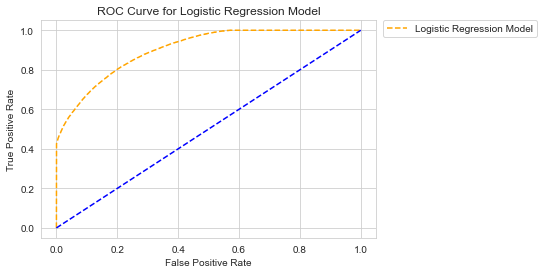

Area under the ROC Curve: 0.9035013049480433


In [267]:
# roc curve for the logistic regression model
fpr_logmodel, tpr_logmodel, _ = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc score for the logistic regression model
auc_score_logmodel = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])

# plot roc curves
# plt.figure(figsize=(12,8))
plt.plot(fpr_logmodel, tpr_logmodel, linestyle='--',color='orange', label='Logistic Regression Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC Curve for Logistic Regression Model')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive Rate')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# plt.savefig('ROC',dpi=300)
plt.show()

print(f'Area under the ROC Curve: {auc_score_logmodel}')

# AdaBoost Classifier Model

AdaBoost or Adaptive Boosting is an ensemble boosting classifier proposed by Yoav Freund and Robert Schapire in 1996. It combines multiple classifiers sequentially to increase the accuracy of classifiers. By using AdaBoost, a strong classifier can be built by combining multiple poorly performing classifiers (stumps) sequentially so that we can get a final strong classifier with high accuracy. The basic concept behind Adaboost is, it will update the weights of data sample after 'learning from mistakes' in each iteration (ie. giving more weights to wrongly predicted data), and proceed to build the next classifier and so on. Finally a powerful classifier can be obtained after combining all the weak classifiers together. 

We will utilize AdaBoostClassifier() from sklearn for building the adaboost classifier model for this project.

Build the AdaBoost Classifier model:

In [268]:
from sklearn.ensemble import AdaBoostClassifier

In [269]:
adamodel = AdaBoostClassifier()

In [270]:
from sklearn.model_selection import RandomizedSearchCV

Use RandomizedSearchCV() for hyperparameter tuning for AdaBoostClassifier()

In [271]:
#param_grid = dict(
#                  learning_rate = [0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00]
#                 )

In [272]:
#ada_cv = RandomizedSearchCV(
#                            adamodel,
#                            param_grid,
#                            cv = 5,
#                            n_iter = 20, 
#                            scoring ='roc_auc',
#                            n_jobs = -1,
#                            verbose = 2
#                            )

#ada_cv.fit(X_train, y_train)

In [273]:
#ada_cv.best_params_
#{'learning_rate': 1.5}

Create another instance of AdaBoostClassifier() using the optimal hyperparameters

In [274]:
adamodel = AdaBoostClassifier(learning_rate = 1.5)

In [275]:
adamodel.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1.5)

Evaluate the AdaBoost Classifier model:

In [276]:
pred_adamodel_train = adamodel.predict(X_train)
pred_adamodel_test = adamodel.predict(X_test)

In [277]:
print("Metrics of the AdaBoost Classifier Model:")

print("")

print("Based on train data:")
print(classification_report(y_train, pred_adamodel_train))
print(confusion_matrix(y_train, pred_adamodel_train))

print("")

print("Based on test data:")
print(classification_report(y_test, pred_adamodel_test))
print(confusion_matrix(y_test, pred_adamodel_test))

Metrics of the AdaBoost Classifier Model:

Based on train data:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94    195354
           1       0.97      0.45      0.62     45654

    accuracy                           0.89    241008
   macro avg       0.93      0.72      0.78    241008
weighted avg       0.90      0.89      0.88    241008

[[194626    728]
 [ 24971  20683]]

Based on test data:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     83253
           1       0.97      0.44      0.61     20037

    accuracy                           0.89    103290
   macro avg       0.92      0.72      0.77    103290
weighted avg       0.90      0.89      0.87    103290

[[82937   316]
 [11168  8869]]


Plot the ROC curve of the AdaBoost Classifier Model:

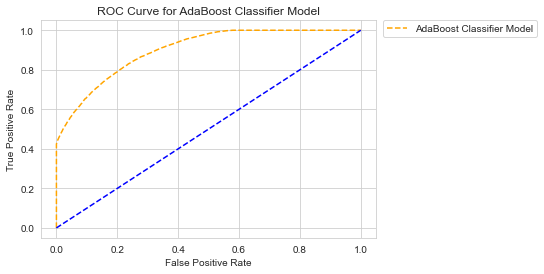

Area under the ROC Curve: 0.9000059596903429


In [278]:
# roc curve for the AdaBoost Classifier model
fpr_adamodel, tpr_adamodel, _ = roc_curve(y_test, adamodel.predict_proba(X_test)[:,1])

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc score for the AdaBoost Classifier model
auc_score_adamodel = roc_auc_score(y_test, adamodel.predict_proba(X_test)[:,1])

# plot roc curves
# plt.figure(figsize=(12,8))
plt.plot(fpr_adamodel, tpr_adamodel, linestyle='--',color='orange', label='AdaBoost Classifier Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC Curve for AdaBoost Classifier Model')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive Rate')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# plt.savefig('ROC',dpi=300)
plt.show()

print(f'Area under the ROC Curve: {auc_score_adamodel}')

# Gradient Boosting Classifier Model

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together sequentially to create a strong predictive model. Decision trees are usually used when doing gradient boosting (for predicting residuals of each iteration, not actual target variable!). Similar to AdaBoost, a strong classifier can be built by combining multiple poorly performing classifiers sequentially so that we can get a final strong classifier with high accuracy. The basic concept behind gradient boosting is, at the beginning a base model will be created to make the first prediction. Subsequently, a decision tree model will be built to predict the residuals made by the base model. With that predicted residuals made by the decision tree, the next model will be built on top of that to make the next predictions and so on. By doing these iterations a series of models can be created sequentially. Finally a powerful classifier can be obtained after combining all the weak classifiers together. 

We will utilize GradientBoostingClassifier() from sklearn for building the gradient boosting classifier for this project.

Build the Gradient Boosting Classifier model:

In [279]:
from sklearn.ensemble import GradientBoostingClassifier

In [280]:
gbmodel = GradientBoostingClassifier()

In [281]:
from sklearn.model_selection import RandomizedSearchCV

Use RandomizedSearchCV() for hyperparameter tuning for GradientBoostingClassifier()

In [282]:
#param_grid = dict(
#                  learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
#                  max_depth = [3, 5, 7, 9, 11, 13, 15]
#                 )

In [283]:
#gb_cv = RandomizedSearchCV(
#                           gbmodel,
#                           param_grid,
#                           cv = 5,
#                           n_iter = 20, 
#                           scoring ='roc_auc',
#                           n_jobs = -1,
#                           verbose = 2
#                          )

#gb_cv.fit(X_train, y_train)

In [284]:
# gb_cv.best_params_
# {'max_depth': 7, 'learning_rate': 0.1}

Create another instance of GradientBoostingClassifier() using the optimal hyperparameters

In [285]:
gbmodel = GradientBoostingClassifier(max_depth = 7, learning_rate = 0.1)

In [286]:
gbmodel.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=7)

Evaluate the Gradient Boosting Classifier model:

In [287]:
pred_gbmodel_train = gbmodel.predict(X_train)
pred_gbmodel_test = gbmodel.predict(X_test)

In [288]:
print("Metrics of the Gradient Boosting Classifier Model:")

print("")

print("Based on train data:")
print(classification_report(y_train, pred_gbmodel_train))
print(confusion_matrix(y_train, pred_gbmodel_train))

print("")

print("Based on test data:")
print(classification_report(y_test, pred_gbmodel_test))
print(confusion_matrix(y_test, pred_gbmodel_test))

Metrics of the Gradient Boosting Classifier Model:

Based on train data:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94    195354
           1       0.96      0.49      0.65     45654

    accuracy                           0.90    241008
   macro avg       0.93      0.74      0.79    241008
weighted avg       0.91      0.90      0.89    241008

[[194400    954]
 [ 23302  22352]]

Based on test data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94     83253
           1       0.93      0.46      0.62     20037

    accuracy                           0.89    103290
   macro avg       0.91      0.73      0.78    103290
weighted avg       0.89      0.89      0.87    103290

[[82597   656]
 [10796  9241]]


Plot the ROC curve of the Gradient Boosting Classifier Model:

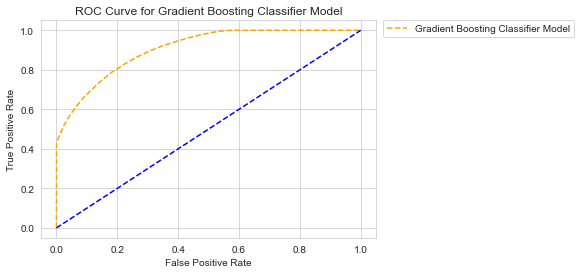

Area under the ROC Curve: 0.9051960280457478


In [289]:
# roc curve for the Gradient Boosting Classifier model
fpr_gbmodel, tpr_gbmodel, _ = roc_curve(y_test, gbmodel.predict_proba(X_test)[:,1])

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc score for the Gradient Boosting Classifier model
auc_score_gbmodel = roc_auc_score(y_test, gbmodel.predict_proba(X_test)[:,1])

# plot roc curves
# plt.figure(figsize=(12,8))
plt.plot(fpr_gbmodel, tpr_gbmodel, linestyle='--',color='orange', label='Gradient Boosting Classifier Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC Curve for Gradient Boosting Classifier Model')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive Rate')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# plt.savefig('ROC',dpi=300)
plt.show()

print(f'Area under the ROC Curve: {auc_score_gbmodel}')

# Extreme Gradient Boosting (XGBoost) Classifier Model

Extreme Gradient Boosting (XGBoost) is an implementation of gradient boosted decision trees designed for speed and performance. Gradient boosting machines are generally very slow in implementation because of sequential model training. Hence, they are not very scalable. Thus, XGBoost is focused on computational speed and model performance. XGBoost provides:

1. Parallelization of tree construction using all of your CPU cores during training.
2. Distributed Computing for training very large models using a cluster of machines.
3. Out-of-Core Computing for very large datasets that don’t fit into memory.
4. Cache Optimization of data structures and algorithm to make the best use of hardware.

We will utilize XGBClassifier() from xgboost for building the extreme gradient boosting classifier for this project.

Build the Extreme Gradient Boosting (XGBoost) Classifier model:

In [290]:
from xgboost import XGBClassifier

In [291]:
xgbmodel = XGBClassifier()

In [292]:
from sklearn.model_selection import RandomizedSearchCV

Use RandomizedSearchCV() for hyperparameter tuning for XGBClassifier()

In [293]:
#param_grid = dict(
#                  learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
#                  max_depth = [3, 5, 7, 9, 11, 13, 15],
#                  gamma = [0, 5, 10, 25, 50, 75, 100]
#                  )

In [294]:
#xgb_cv = RandomizedSearchCV(
#                             xgbmodel,
#                             param_grid,
#                             cv = 5,
#                             n_iter = 20, 
#                             scoring ='roc_auc',
#                             n_jobs = -1,
#                             verbose = 2
#                             )

#xgb_cv.fit(X_train, y_train)

In [295]:
# xgb_cv.best_params_
# {'max_depth': 5, 'learning_rate': 0.25, 'gamma': 5}

Create another instance of XGBClassifier() using the optimal hyperparameters

In [296]:
xgbmodel = XGBClassifier(max_depth = 5, learning_rate = 0.25, gamma = 5)

In [297]:
xgbmodel.fit(X_train,y_train)

C:\Users\jacks\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:14:32] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Evaluate the Extreme Gradient Boosting (XGBoost) Classifier model:

In [298]:
pred_xgbmodel_train = xgbmodel.predict(X_train)
pred_xgbmodel_test = xgbmodel.predict(X_test)

In [299]:
print("Metrics of the Extreme Gradient Boosting (XGBoost) Classifier Model:")

print("")

print("Based on train data:")
print(classification_report(y_train, pred_xgbmodel_train))
print(confusion_matrix(y_train, pred_xgbmodel_train))

print("")

print("Based on test data:")
print(classification_report(y_test, pred_xgbmodel_test))
print(confusion_matrix(y_test, pred_xgbmodel_test))

Metrics of the Extreme Gradient Boosting (XGBoost) Classifier Model:

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.95      0.48      0.63     45654

    accuracy                           0.90    241008
   macro avg       0.92      0.73      0.79    241008
weighted avg       0.90      0.90      0.88    241008

[[194166   1188]
 [ 23953  21701]]

Based on test data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94     83253
           1       0.94      0.46      0.62     20037

    accuracy                           0.89    103290
   macro avg       0.91      0.73      0.78    103290
weighted avg       0.89      0.89      0.87    103290

[[82661   592]
 [10843  9194]]


Plot the ROC curve of the Extreme Gradient Boosting (XGBoost) Classifier Model:

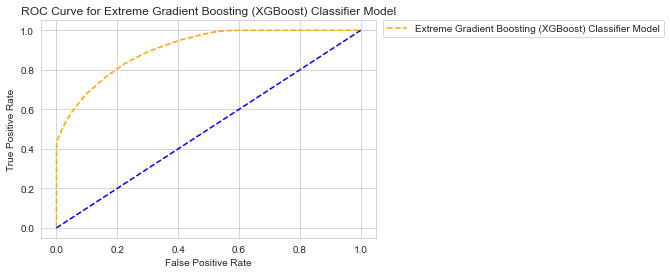

Area under the ROC Curve: 0.9052366697097138


In [300]:
# roc curve for the Extreme Gradient Boosting (XGBoost) Classifier model
fpr_xgbmodel, tpr_xgbmodel, _ = roc_curve(y_test, xgbmodel.predict_proba(X_test)[:,1])

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc score for the Extreme Gradient Boosting (XGBoost) Classifier model
auc_score_xgbmodel = roc_auc_score(y_test, xgbmodel.predict_proba(X_test)[:,1])

# plot roc curves
# plt.figure(figsize=(12,8))
plt.plot(fpr_xgbmodel, tpr_xgbmodel, linestyle='--',color='orange', label='Extreme Gradient Boosting (XGBoost) Classifier Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC Curve for Extreme Gradient Boosting (XGBoost) Classifier Model')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive Rate')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# plt.savefig('ROC',dpi=300)
plt.show()

print(f'Area under the ROC Curve: {auc_score_xgbmodel}')

# Random Forest Model

Random forest is a machine learning algorithm which can be used to solve regression and classification problems. It belongs to the group of ensemble learning, same as AdaBoost for example, which is a technique that combines many weak learners to provide solutions to complex problems. However, the key difference between random forest and AdaBoost is that, the former use bagging technique, while the latter use boosting technique. Below is a simple comparison for Boosting vs Bagging:

1. Boosting:
    - It combines weak learners into a strong learner by creating sequential models such that the final model has the highest accuracy. In this model, weak learners learn sequentially and adaptively to improve model predictions of a learning algorithm (weak learners are trained sequentially).
    - For weak learners that exibit low variance and high bias (underfitting).
    - Example algorithms: AdaBoost, Gradient Boosting, XGBoost.


2. Bagging:
    - A homogeneous weak learners’ model that the weak learners learn in parallel and independent from each other. The final model is the combination of all the weak learners and the predictions made by the final model is based on the majority votes (classification) or average values (regression) of the weak learners (weak learners are trained in parellel and independently).
    - For weak learners that exibit high variance and low bias (overfitting).
    - Example algorithms: Random Forest.

Random forest algorithm consists of many decision trees. Decision trees of random forest are created based on row and column sampling with replacement from the original training dataset. Random forest generally encounter less overfitting problem than decision tree, and also less affected by change of training data (less variance compared to decision tree). 

We will utilize RandomForestClassifier() from sklearn for building the random forest classifier model for this project.

Build the Random Forest model:

In [301]:
from sklearn.ensemble import RandomForestClassifier

In [302]:
rfmodel = RandomForestClassifier()

In [303]:
from sklearn.model_selection import RandomizedSearchCV

Use RandomizedSearchCV() for hyperparameter tuning for RandomForestClassifier()

In [304]:
#param_grid = dict(
#                  max_depth = [5, 10, 15, 20, 25]
#                 )

In [305]:
#rf_cv = RandomizedSearchCV(
#                           rfmodel,
#                           param_grid,
#                           cv = 5,
#                           n_iter = 20, 
#                           scoring ='roc_auc',
#                           n_jobs = -1,
#                           verbose = 2
#                          )

#rf_cv.fit(X_train, y_train)

In [306]:
#rf_cv.best_params_
#{'max_depth': 20}

Create another instance of RandomForestClassifier() using the optimal hyperparameters

In [307]:
rfmodel = RandomForestClassifier(max_depth = 20)

In [308]:
rfmodel.fit(X_train,y_train)

RandomForestClassifier(max_depth=20)

Evaluate the Random Forest model:

In [309]:
pred_rfmodel_train = rfmodel.predict(X_train)
pred_rfmodel_test = rfmodel.predict(X_test)

In [310]:
print("Metrics of the Random Forest Model:")

print("")

print("Based on train data:")
print(classification_report(y_train, pred_rfmodel_train))
print(confusion_matrix(y_train, pred_rfmodel_train))

print("")

print("Based on test data:")
print(classification_report(y_test, pred_rfmodel_test))
print(confusion_matrix(y_test, pred_rfmodel_test))

Metrics of the Random Forest Model:

Based on train data:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    195354
           1       1.00      0.55      0.71     45654

    accuracy                           0.92    241008
   macro avg       0.95      0.78      0.83    241008
weighted avg       0.92      0.92      0.91    241008

[[195352      2]
 [ 20378  25276]]

Based on test data:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     83253
           1       0.98      0.43      0.60     20037

    accuracy                           0.89    103290
   macro avg       0.93      0.72      0.77    103290
weighted avg       0.90      0.89      0.87    103290

[[83089   164]
 [11323  8714]]


Plot the ROC curve of the Random Forest Model:

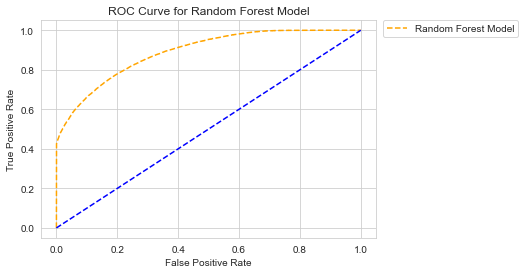

Area under the ROC Curve: 0.8888731857738439


In [311]:
# roc curve for the Random Forest model
fpr_rfmodel, tpr_rfmodel, _ = roc_curve(y_test, rfmodel.predict_proba(X_test)[:,1])

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc score for the Random Forest model
auc_score_rfmodel = roc_auc_score(y_test, rfmodel.predict_proba(X_test)[:,1])

# plot roc curves
# plt.figure(figsize=(12,8))
plt.plot(fpr_rfmodel, tpr_rfmodel, linestyle='--',color='orange', label='Random Forest Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC Curve for Random Forest Model')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive Rate')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# plt.savefig('ROC',dpi=300)
plt.show()

print(f'Area under the ROC Curve: {auc_score_rfmodel}')

# Neural Network Model

Artificial neural networks (ANNs), usually simply called neural networks (NNs), are computing systems inspired by the biological neural networks that constitute animal brains. Neural networks allow complex nonlinear relationships between the response variable and its predictors. A neural network can be thought of as a network of “neurons” which are organised in layers. The predictors (or inputs) form the input layer, and the predictions (or outputs) form the output layer. There may also be intermediate layers containing “hidden neurons”.


Below is the general guideline for choosing the number of hidden layers of a neural network:

Number of hidden layers and its implications:

    i. No hidden layer:
    Only capable of representing linear separable functions or decisions.
    
    ii. 1 hidden layer:
    Can approximate any function that contains a continuous mapping from one finite space to another.
    
    iii. 2 hidden layers:
    Can represent an arbitrary decision boundary to arbitrary accuracy with rational activation functions and can
    approximate any smooth mapping to any accuracy. Neural networks with 2 or more hidden layers are also called deep neural networks.

There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:

    i. The number of hidden neurons should be between the size of the input layer and the size of the output layer.

    ii. The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.

    iii. The number of hidden neurons should be less than twice the size of the input layer.

References: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

For this project, we will study the performances of neural network models with 1 and 2 hidden layers, each with different numbers of hidden neurons and we will compare their performances based on AUC scores.

Build the Neural Network model:

In [312]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping

# Construct the Neural Network (for the case of only 1 hidden layer)

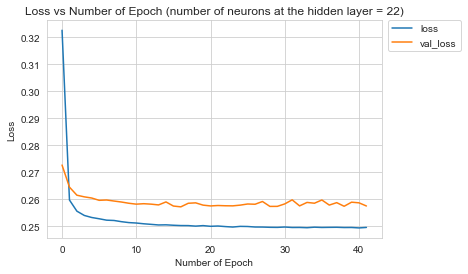

3228/3228 [==============================] - 1s 410us/step


Metrics of the Neural Network Model (number of neurons at the hidden layer = 22):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.92      0.48      0.63     45654

    accuracy                           0.89    241008
   macro avg       0.90      0.74      0.79    241008
weighted avg       0.90      0.89      0.88    241008

[[193410   1944]
 [ 23646  22008]]

Based on test data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93     83253
           1       0.92      0.47      0.62     20037

    accuracy                           0.89    103290
   macro avg       0.90      0.73      0.78    103290
weighted avg       0.89      0.89      0.87    103290

[[82415   838]
 [10627  9410]]


3228/3228 [==============================] - 1s 403us/step


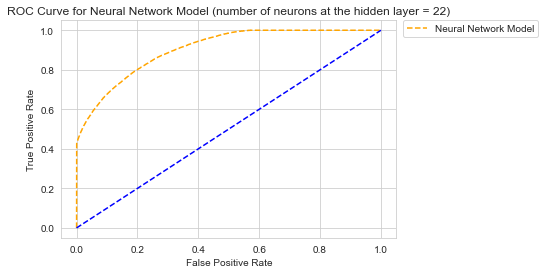

Area under the ROC Curve: 0.9040548306114632



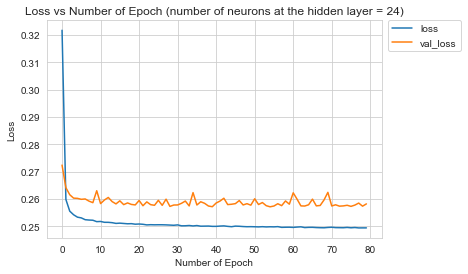

3228/3228 [==============================] - 1s 410us/step


Metrics of the Neural Network Model (number of neurons at the hidden layer = 24):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.96      0.46      0.62     45654

    accuracy                           0.89    241008
   macro avg       0.92      0.73      0.78    241008
weighted avg       0.90      0.89      0.88    241008

[[194376    978]
 [ 24593  21061]]

Based on test data:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     83253
           1       0.96      0.45      0.61     20037

    accuracy                           0.89    103290
   macro avg       0.92      0.72      0.77    103290
weighted avg       0.90      0.89      0.87    103290

[[82849   404]
 [11030  9007]]


3228/3228 [==============================] - 1s 419us/step


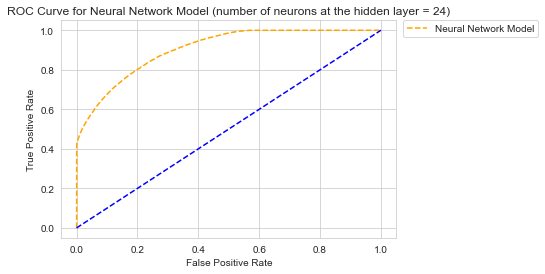

Area under the ROC Curve: 0.9045311604327282



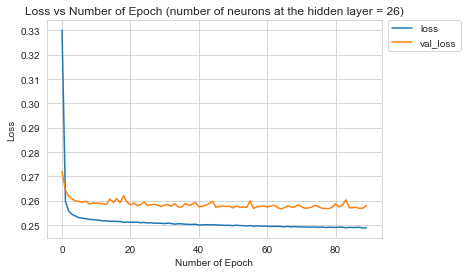

3228/3228 [==============================] - 1s 400us/step


Metrics of the Neural Network Model (number of neurons at the hidden layer = 26):

Based on train data:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94    195354
           1       0.87      0.51      0.64     45654

    accuracy                           0.89    241008
   macro avg       0.88      0.75      0.79    241008
weighted avg       0.89      0.89      0.88    241008

[[191919   3435]
 [ 22467  23187]]

Based on test data:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     83253
           1       0.87      0.50      0.63     20037

    accuracy                           0.89    103290
   macro avg       0.88      0.74      0.78    103290
weighted avg       0.89      0.89      0.88    103290

[[81791  1462]
 [10098  9939]]


3228/3228 [==============================] - 1s 416us/step


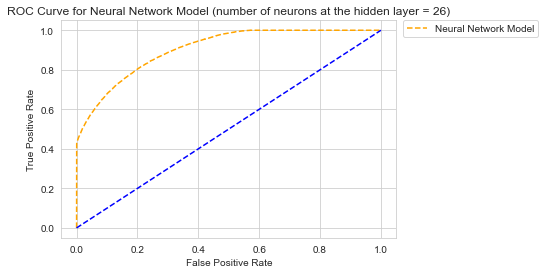

Area under the ROC Curve: 0.9046953300712086



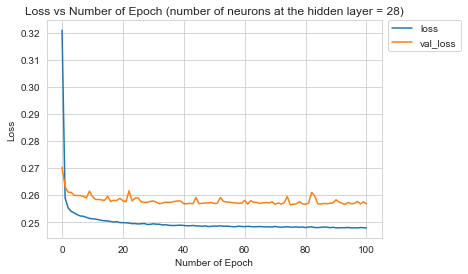

3228/3228 [==============================] - 1s 410us/step


Metrics of the Neural Network Model (number of neurons at the hidden layer = 28):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.95      0.47      0.63     45654

    accuracy                           0.89    241008
   macro avg       0.92      0.73      0.78    241008
weighted avg       0.90      0.89      0.88    241008

[[194124   1230]
 [ 24341  21313]]

Based on test data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94     83253
           1       0.95      0.45      0.61     20037

    accuracy                           0.89    103290
   macro avg       0.91      0.72      0.77    103290
weighted avg       0.90      0.89      0.87    103290

[[82723   530]
 [10926  9111]]


3228/3228 [==============================] - 1s 403us/step


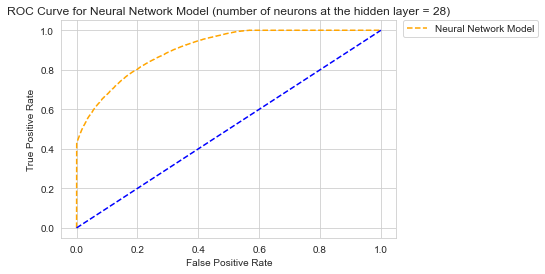

Area under the ROC Curve: 0.9051125581512143



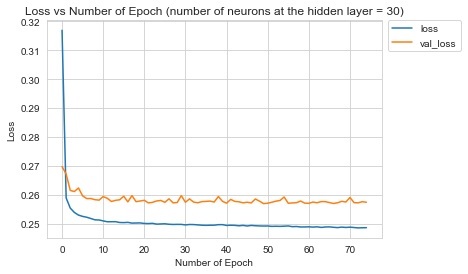

3228/3228 [==============================] - 1s 418us/step


Metrics of the Neural Network Model (number of neurons at the hidden layer = 30):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.91      0.49      0.64     45654

    accuracy                           0.89    241008
   macro avg       0.90      0.74      0.79    241008
weighted avg       0.89      0.89      0.88    241008

[[193043   2311]
 [ 23324  22330]]

Based on test data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93     83253
           1       0.91      0.48      0.62     20037

    accuracy                           0.89    103290
   macro avg       0.90      0.73      0.78    103290
weighted avg       0.89      0.89      0.87    103290

[[82263   990]
 [10483  9554]]


3228/3228 [==============================] - 1s 400us/step


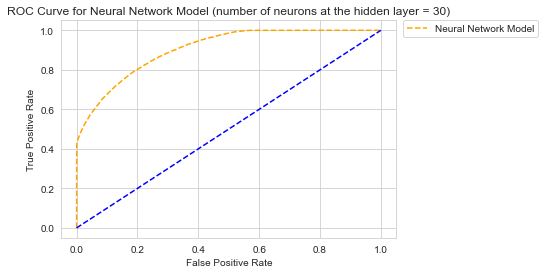

Area under the ROC Curve: 0.9044418618919802


Summary of Results:
         No of neurons (hidd.)       AUC
Case No                                 
1                           22  0.904055
2                           24  0.904531
3                           26  0.904695
4                           28  0.905113
5                           30  0.904442

Case for the highest area under the ROC Curve:


,No of neurons (hidd.),AUC
Case No,,
4,28,0.905113


In [313]:
# Specify the numbers of neurons to be considered at the hidden layer 
num_neurons = [22, 24, 26, 28, 30]  

# Initialization of variables 
case_no = 1
num_neurons_list = []
auc_list = []

# Do a for-loop to evaluate every case of number of neurons specified at the hidden layer
for num in num_neurons:
    
    # Create an instance of the neural network model
    nnmodel = Sequential()

    # Contruct the hidden layer of the neural network
    nnmodel.add(Dense(units = num, activation='relu'))

    # Contruct the output layer (activation = 'sigmoid' for binary classification)
    nnmodel.add(Dense(units = 1, activation='sigmoid'))

    # Compile the neural network model using Adam (adaptive moment estimation) for optimization
    nnmodel.compile(loss = 'binary_crossentropy', optimizer = 'adam')

    # Employ early stopping to stop training the neural network model if no improvement
    early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 0, patience = 25)

    # Fit the train data to the neural network model
    nnmodel.fit(
                x = X_train,
                y = y_train,
                batch_size = 256,
                epochs = 500,
                verbose = 0,
                validation_data = (X_test,y_test),
                callbacks = [early_stop]
                )

    # Plot the Loss vs Number of Epoch curve
    losses = pd.DataFrame(nnmodel.history.history)
    losses[['loss','val_loss']].plot()

    plt.title(f'Loss vs Number of Epoch (number of neurons at the hidden layer = {num})')

    plt.xlabel('Number of Epoch')

    plt.ylabel('Loss')

    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()
    
    # Evaluate the neural network model:
    pred_nnmodel_train = (nnmodel.predict(X_train) > 0.5) * 1
    pred_nnmodel_test = (nnmodel.predict(X_test) > 0.5) * 1
    
    print("")
    print("")
    print(f"Metrics of the Neural Network Model (number of neurons at the hidden layer = {num}):")
    print("")
    print("Based on train data:")
    print(classification_report(y_train, pred_nnmodel_train))
    print(confusion_matrix(y_train, pred_nnmodel_train))
    print("")
    print("Based on test data:")
    print(classification_report(y_test, pred_nnmodel_test))
    print(confusion_matrix(y_test, pred_nnmodel_test))
    print("")
    print("")
 
    # roc curve for the neural network model
    fpr_nnmodel, tpr_nnmodel, _ = roc_curve(y_test, nnmodel.predict(X_test))

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

    # auc score for the neural network model
    auc_score_nnmodel = roc_auc_score(y_test, nnmodel.predict(X_test))

    # plot roc curves
    # plt.figure(figsize=(12,8))
    plt.plot(fpr_nnmodel, tpr_nnmodel, linestyle='--',color='orange', label='Neural Network Model')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

    # title
    plt.title(f'ROC Curve for Neural Network Model (number of neurons at the hidden layer = {num})')

    # x label
    plt.xlabel('False Positive Rate')

    # y label
    plt.ylabel('True Positive Rate')

    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    # plt.savefig('ROC',dpi=300)
    plt.show()

    print(f'Area under the ROC Curve: {auc_score_nnmodel}')
    print("")
    print("================================================================================================================")
    print("================================================================================================================")
    
    # Update variables for the next loop
    case_no += 1
    num_neurons_list.append(num)
    auc_list.append(auc_score_nnmodel)
    
print('')

# Create a dataframe to report the summary of results
result_summary_1hiddenlayer = pd.DataFrame({
                                            'Case No': list(range(1, case_no)),
                                            'No of neurons (hidd.)': num_neurons_list,
                                            'AUC': auc_list
                                           })
result_summary_1hiddenlayer.set_index('Case No', inplace=True)

print('Summary of Results:')
print(result_summary_1hiddenlayer)

print('')

print('Case for the highest area under the ROC Curve:')
nn_1hiddenlayer_bestauc = result_summary_1hiddenlayer[result_summary_1hiddenlayer['AUC'] == result_summary_1hiddenlayer['AUC'].max()]
nn_1hiddenlayer_bestauc

# Construct the Neural Network (for the case of 2 hidden layers)

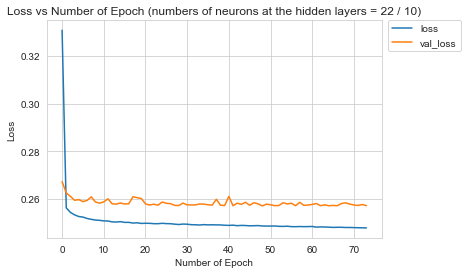

3228/3228 [==============================] - 1s 411us/step


Metrics of the Neural Network Model (numbers of neurons at the hidden layers = 22 / 10):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.95      0.47      0.63     45654

    accuracy                           0.89    241008
   macro avg       0.92      0.73      0.78    241008
weighted avg       0.90      0.89      0.88    241008

[[194192   1162]
 [ 24301  21353]]

Based on test data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94     83253
           1       0.95      0.45      0.61     20037

    accuracy                           0.89    103290
   macro avg       0.92      0.72      0.77    103290
weighted avg       0.90      0.89      0.87    103290

[[82741   512]
 [10927  9110]]


3228/3228 [==============================] - 1s 412us/step


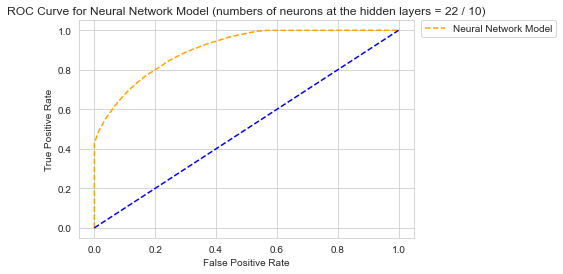

Area under the ROC Curve: 0.9043204395556256



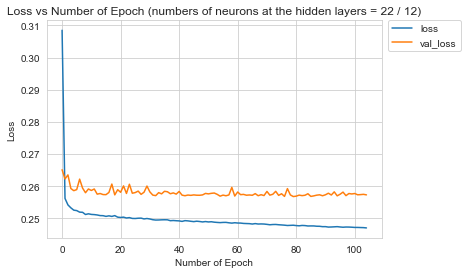

3228/3228 [==============================] - 1s 406us/step


Metrics of the Neural Network Model (numbers of neurons at the hidden layers = 22 / 12):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.92      0.48      0.63     45654

    accuracy                           0.89    241008
   macro avg       0.91      0.74      0.79    241008
weighted avg       0.90      0.89      0.88    241008

[[193541   1813]
 [ 23654  22000]]

Based on test data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93     83253
           1       0.92      0.47      0.62     20037

    accuracy                           0.89    103290
   macro avg       0.90      0.73      0.78    103290
weighted avg       0.89      0.89      0.87    103290

[[82465   788]
 [10694  9343]]


3228/3228 [==============================] - 1s 414us/step


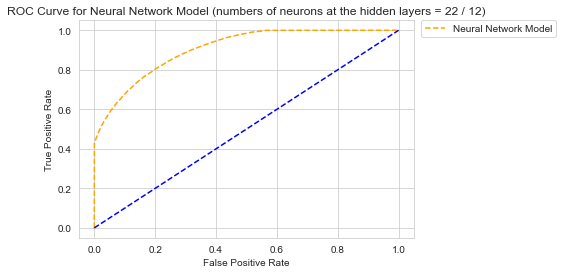

Area under the ROC Curve: 0.9046037943086492



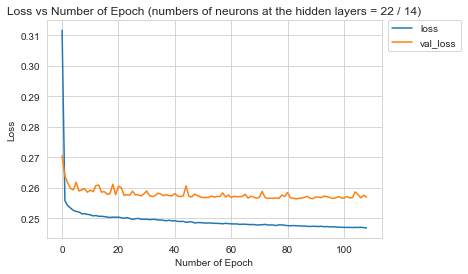

3228/3228 [==============================] - 1s 398us/step


Metrics of the Neural Network Model (numbers of neurons at the hidden layers = 22 / 14):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.92      0.48      0.64     45654

    accuracy                           0.89    241008
   macro avg       0.91      0.74      0.79    241008
weighted avg       0.90      0.89      0.88    241008

[[193465   1889]
 [ 23513  22141]]

Based on test data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93     83253
           1       0.92      0.47      0.62     20037

    accuracy                           0.89    103290
   macro avg       0.90      0.73      0.78    103290
weighted avg       0.89      0.89      0.87    103290

[[82388   865]
 [10622  9415]]


3228/3228 [==============================] - 1s 400us/step


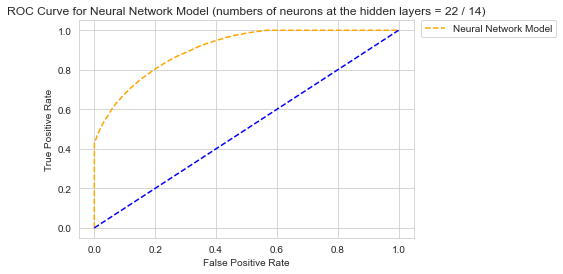

Area under the ROC Curve: 0.9050859356912353



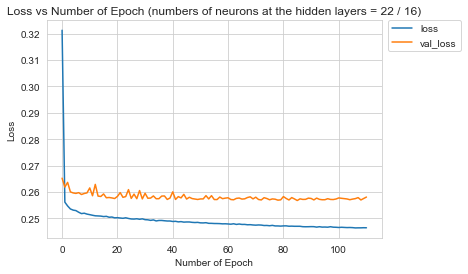

3228/3228 [==============================] - 1s 429us/step


Metrics of the Neural Network Model (numbers of neurons at the hidden layers = 22 / 16):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.95      0.47      0.63     45654

    accuracy                           0.89    241008
   macro avg       0.92      0.73      0.78    241008
weighted avg       0.90      0.89      0.88    241008

[[194335   1019]
 [ 24415  21239]]

Based on test data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94     83253
           1       0.95      0.45      0.61     20037

    accuracy                           0.89    103290
   macro avg       0.92      0.72      0.77    103290
weighted avg       0.90      0.89      0.87    103290

[[82772   481]
 [10959  9078]]


3228/3228 [==============================] - 1s 422us/step


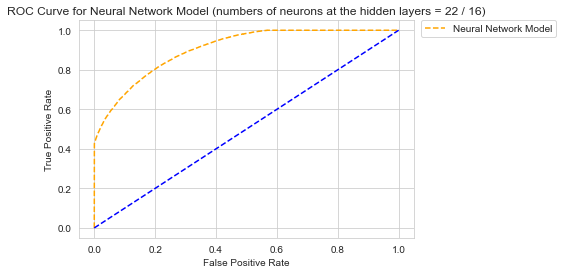

Area under the ROC Curve: 0.904648029794898



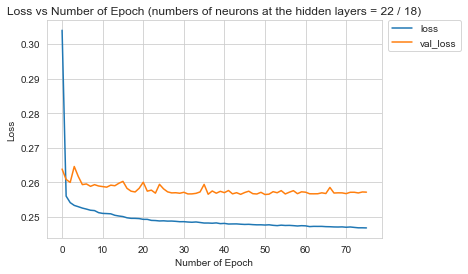

3228/3228 [==============================] - 1s 419us/step


Metrics of the Neural Network Model (numbers of neurons at the hidden layers = 22 / 18):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.93      0.48      0.63     45654

    accuracy                           0.89    241008
   macro avg       0.91      0.74      0.79    241008
weighted avg       0.90      0.89      0.88    241008

[[193650   1704]
 [ 23738  21916]]

Based on test data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     83253
           1       0.93      0.47      0.62     20037

    accuracy                           0.89    103290
   macro avg       0.91      0.73      0.78    103290
weighted avg       0.89      0.89      0.87    103290

[[82498   755]
 [10691  9346]]


3228/3228 [==============================] - 1s 442us/step


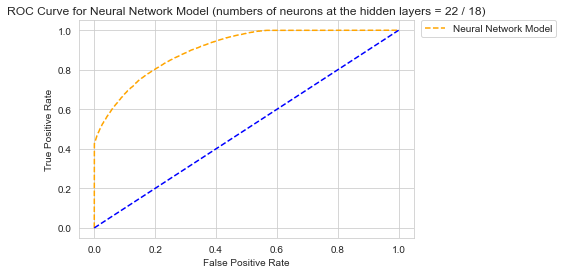

Area under the ROC Curve: 0.9046318231251045



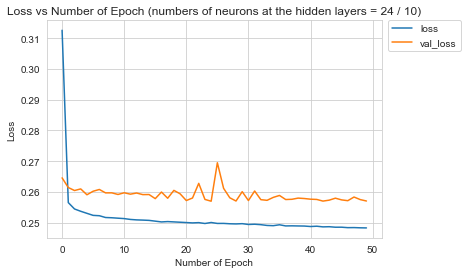

3228/3228 [==============================] - 1s 418us/step


Metrics of the Neural Network Model (numbers of neurons at the hidden layers = 24 / 10):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.92      0.48      0.63     45654

    accuracy                           0.89    241008
   macro avg       0.90      0.74      0.79    241008
weighted avg       0.90      0.89      0.88    241008

[[193355   1999]
 [ 23523  22131]]

Based on test data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     83253
           1       0.92      0.47      0.62     20037

    accuracy                           0.89    103290
   macro avg       0.90      0.73      0.78    103290
weighted avg       0.89      0.89      0.87    103290

[[82402   851]
 [10566  9471]]


3228/3228 [==============================] - 1s 418us/step


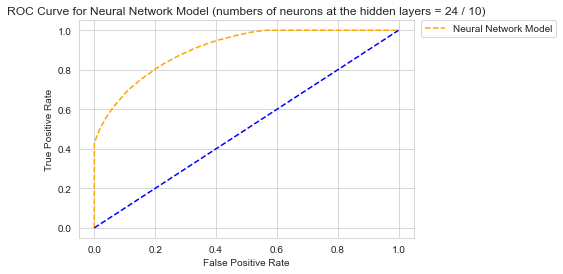

Area under the ROC Curve: 0.9048457517658491



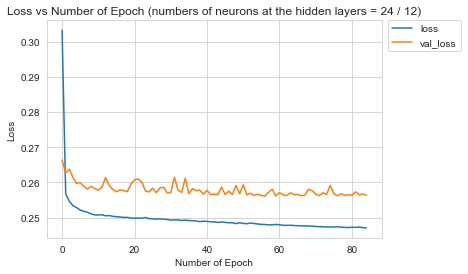

3228/3228 [==============================] - 1s 456us/step


Metrics of the Neural Network Model (numbers of neurons at the hidden layers = 24 / 12):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.94      0.47      0.63     45654

    accuracy                           0.89    241008
   macro avg       0.91      0.73      0.78    241008
weighted avg       0.90      0.89      0.88    241008

[[193871   1483]
 [ 24016  21638]]

Based on test data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94     83253
           1       0.94      0.46      0.62     20037

    accuracy                           0.89    103290
   macro avg       0.91      0.73      0.78    103290
weighted avg       0.89      0.89      0.87    103290

[[82622   631]
 [10783  9254]]


3228/3228 [==============================] - 1s 440us/step


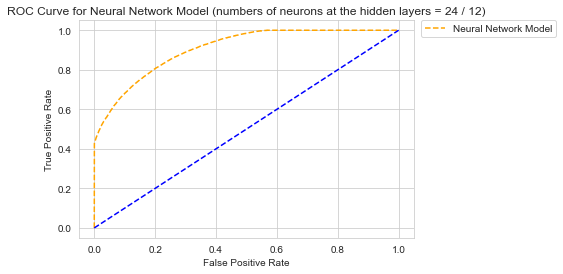

Area under the ROC Curve: 0.9054652625840998



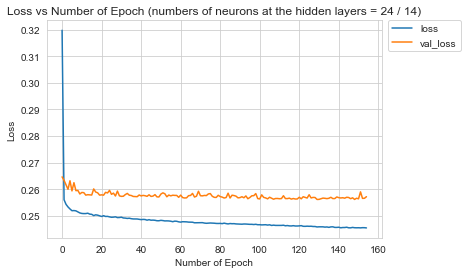

3228/3228 [==============================] - 1s 417us/step


Metrics of the Neural Network Model (numbers of neurons at the hidden layers = 24 / 14):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.95      0.47      0.63     45654

    accuracy                           0.89    241008
   macro avg       0.92      0.73      0.78    241008
weighted avg       0.90      0.89      0.88    241008

[[194340   1014]
 [ 24328  21326]]

Based on test data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94     83253
           1       0.95      0.45      0.61     20037

    accuracy                           0.89    103290
   macro avg       0.92      0.72      0.77    103290
weighted avg       0.90      0.89      0.87    103290

[[82804   449]
 [10957  9080]]


3228/3228 [==============================] - 1s 424us/step


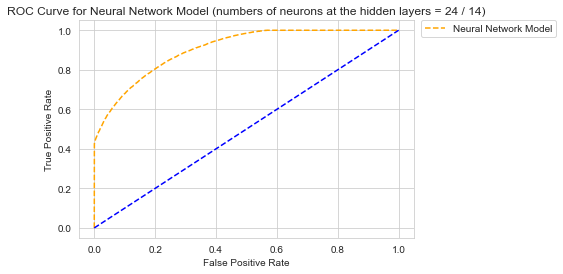

Area under the ROC Curve: 0.9053967012072074



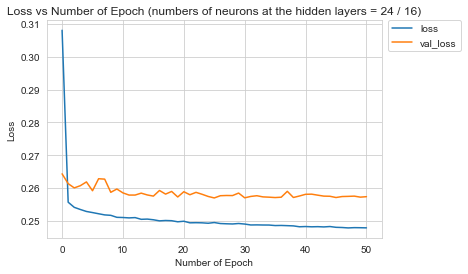

3228/3228 [==============================] - 1s 402us/step


Metrics of the Neural Network Model (numbers of neurons at the hidden layers = 24 / 16):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.95      0.47      0.62     45654

    accuracy                           0.89    241008
   macro avg       0.92      0.73      0.78    241008
weighted avg       0.90      0.89      0.88    241008

[[194275   1079]
 [ 24418  21236]]

Based on test data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94     83253
           1       0.95      0.45      0.61     20037

    accuracy                           0.89    103290
   macro avg       0.92      0.72      0.77    103290
weighted avg       0.90      0.89      0.87    103290

[[82794   459]
 [10965  9072]]


3228/3228 [==============================] - 1s 411us/step


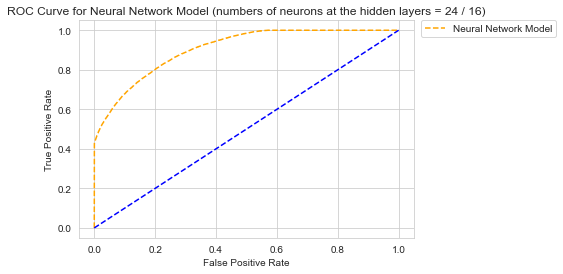

Area under the ROC Curve: 0.9048617111542929



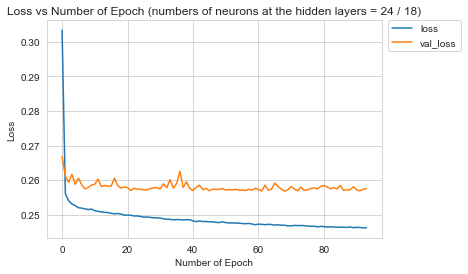

3228/3228 [==============================] - 1s 421us/step


Metrics of the Neural Network Model (numbers of neurons at the hidden layers = 24 / 18):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.94      0.47      0.63     45654

    accuracy                           0.89    241008
   macro avg       0.92      0.73      0.78    241008
weighted avg       0.90      0.89      0.88    241008

[[193991   1363]
 [ 24030  21624]]

Based on test data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94     83253
           1       0.94      0.46      0.62     20037

    accuracy                           0.89    103290
   macro avg       0.91      0.73      0.78    103290
weighted avg       0.89      0.89      0.87    103290

[[82638   615]
 [10846  9191]]


3228/3228 [==============================] - 1s 413us/step


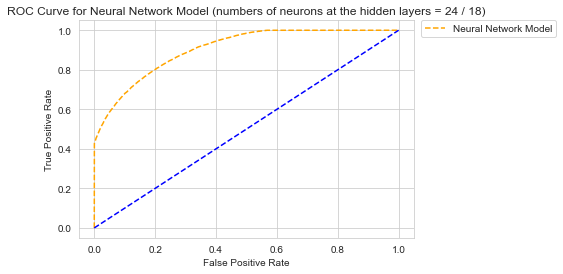

Area under the ROC Curve: 0.9044076270629844



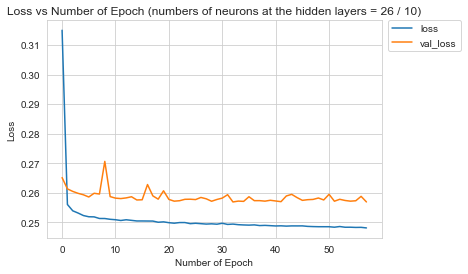

3228/3228 [==============================] - 1s 413us/step


Metrics of the Neural Network Model (numbers of neurons at the hidden layers = 26 / 10):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.94      0.47      0.63     45654

    accuracy                           0.89    241008
   macro avg       0.92      0.73      0.78    241008
weighted avg       0.90      0.89      0.88    241008

[[194093   1261]
 [ 24223  21431]]

Based on test data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94     83253
           1       0.94      0.46      0.61     20037

    accuracy                           0.89    103290
   macro avg       0.91      0.72      0.77    103290
weighted avg       0.89      0.89      0.87    103290

[[82698   555]
 [10905  9132]]


3228/3228 [==============================] - 1s 407us/step


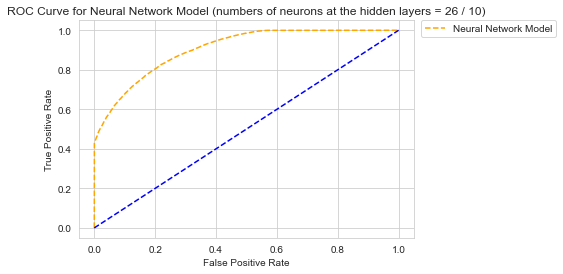

Area under the ROC Curve: 0.9048749372595513



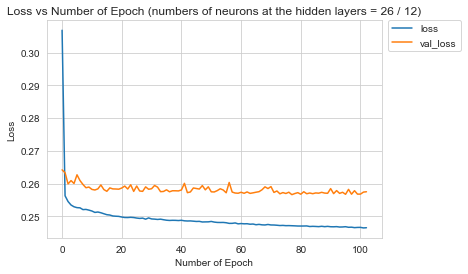

3228/3228 [==============================] - 1s 404us/step


Metrics of the Neural Network Model (numbers of neurons at the hidden layers = 26 / 12):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.94      0.47      0.63     45654

    accuracy                           0.89    241008
   macro avg       0.92      0.73      0.78    241008
weighted avg       0.90      0.89      0.88    241008

[[194068   1286]
 [ 24116  21538]]

Based on test data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94     83253
           1       0.94      0.46      0.62     20037

    accuracy                           0.89    103290
   macro avg       0.91      0.73      0.78    103290
weighted avg       0.89      0.89      0.87    103290

[[82651   602]
 [10849  9188]]


3228/3228 [==============================] - 1s 410us/step


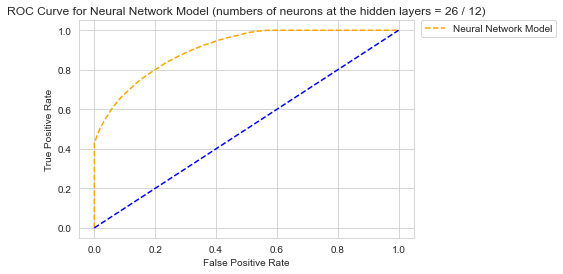

Area under the ROC Curve: 0.9044647868213771



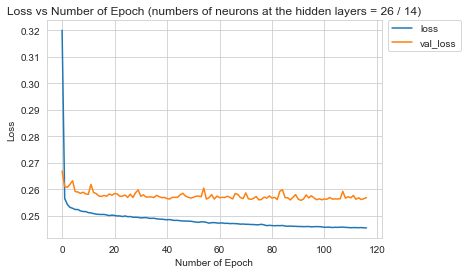

3228/3228 [==============================] - 1s 408us/step


Metrics of the Neural Network Model (numbers of neurons at the hidden layers = 26 / 14):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.94      0.48      0.63     45654

    accuracy                           0.90    241008
   macro avg       0.91      0.73      0.79    241008
weighted avg       0.90      0.90      0.88    241008

[[193952   1402]
 [ 23881  21773]]

Based on test data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94     83253
           1       0.93      0.46      0.62     20037

    accuracy                           0.89    103290
   macro avg       0.91      0.73      0.78    103290
weighted avg       0.89      0.89      0.87    103290

[[82601   652]
 [10797  9240]]


3228/3228 [==============================] - 1s 409us/step


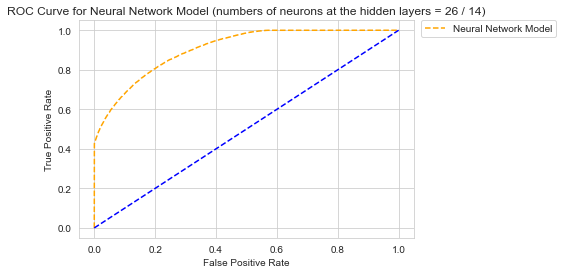

Area under the ROC Curve: 0.9057799567263153



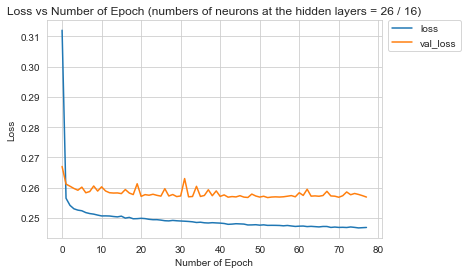

3228/3228 [==============================] - 1s 403us/step


Metrics of the Neural Network Model (numbers of neurons at the hidden layers = 26 / 16):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.93      0.48      0.63     45654

    accuracy                           0.89    241008
   macro avg       0.91      0.74      0.79    241008
weighted avg       0.90      0.89      0.88    241008

[[193767   1587]
 [ 23792  21862]]

Based on test data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     83253
           1       0.93      0.47      0.62     20037

    accuracy                           0.89    103290
   macro avg       0.91      0.73      0.78    103290
weighted avg       0.89      0.89      0.87    103290

[[82532   721]
 [10704  9333]]


3228/3228 [==============================] - 1s 415us/step


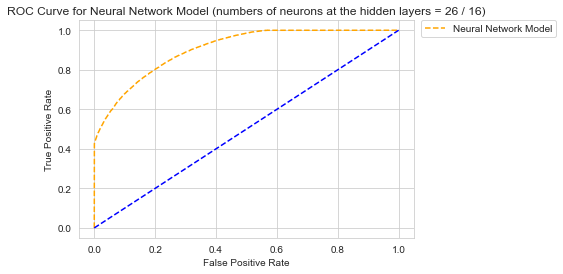

Area under the ROC Curve: 0.9049674129909744



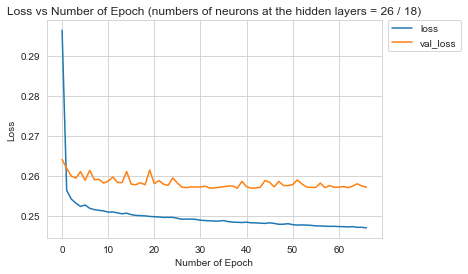

3228/3228 [==============================] - 1s 407us/step


Metrics of the Neural Network Model (numbers of neurons at the hidden layers = 26 / 18):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.93      0.48      0.63     45654

    accuracy                           0.89    241008
   macro avg       0.91      0.73      0.78    241008
weighted avg       0.90      0.89      0.88    241008

[[193782   1572]
 [ 23914  21740]]

Based on test data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94     83253
           1       0.93      0.46      0.62     20037

    accuracy                           0.89    103290
   macro avg       0.91      0.73      0.78    103290
weighted avg       0.89      0.89      0.87    103290

[[82566   687]
 [10748  9289]]


3228/3228 [==============================] - 1s 405us/step


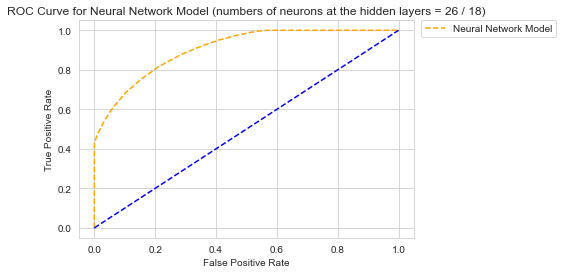

Area under the ROC Curve: 0.9044968060094793



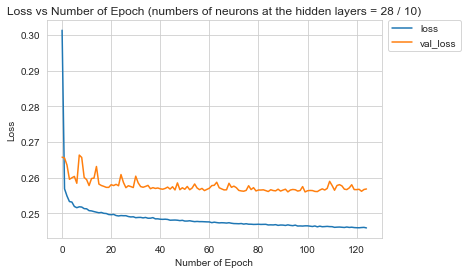

3228/3228 [==============================] - 1s 423us/step


Metrics of the Neural Network Model (numbers of neurons at the hidden layers = 28 / 10):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94    195354
           1       0.96      0.46      0.62     45654

    accuracy                           0.89    241008
   macro avg       0.92      0.73      0.78    241008
weighted avg       0.90      0.89      0.88    241008

[[194411    943]
 [ 24534  21120]]

Based on test data:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     83253
           1       0.96      0.45      0.61     20037

    accuracy                           0.89    103290
   macro avg       0.92      0.72      0.77    103290
weighted avg       0.90      0.89      0.87    103290

[[82841   412]
 [11036  9001]]


3228/3228 [==============================] - 1s 415us/step


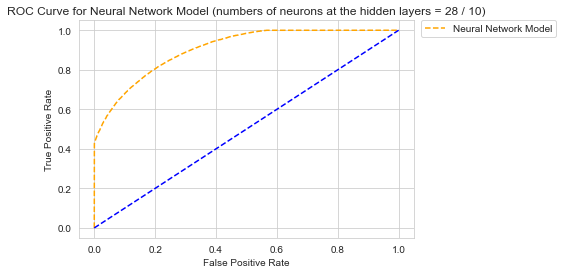

Area under the ROC Curve: 0.9053316500265411



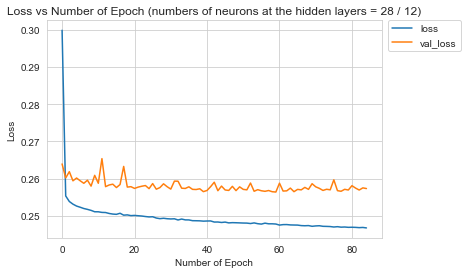

3228/3228 [==============================] - 1s 415us/step


Metrics of the Neural Network Model (numbers of neurons at the hidden layers = 28 / 12):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.95      0.47      0.63     45654

    accuracy                           0.89    241008
   macro avg       0.92      0.73      0.78    241008
weighted avg       0.90      0.89      0.88    241008

[[194234   1120]
 [ 24321  21333]]

Based on test data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94     83253
           1       0.95      0.46      0.61     20037

    accuracy                           0.89    103290
   macro avg       0.92      0.72      0.78    103290
weighted avg       0.90      0.89      0.87    103290

[[82746   507]
 [10916  9121]]


3228/3228 [==============================] - 1s 416us/step


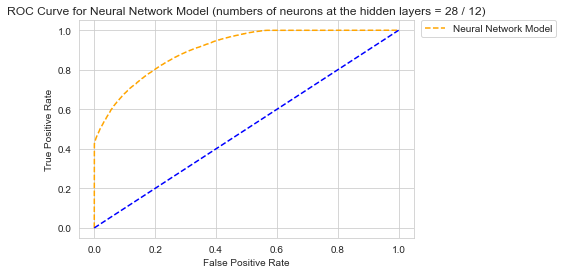

Area under the ROC Curve: 0.9049869233396002



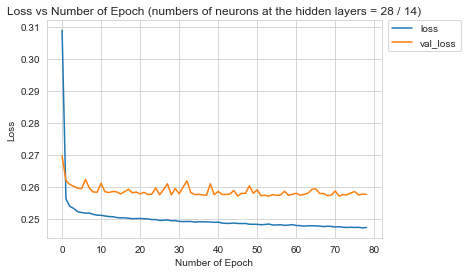

3228/3228 [==============================] - 1s 415us/step


Metrics of the Neural Network Model (numbers of neurons at the hidden layers = 28 / 14):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.95      0.47      0.63     45654

    accuracy                           0.89    241008
   macro avg       0.92      0.73      0.78    241008
weighted avg       0.90      0.89      0.88    241008

[[194175   1179]
 [ 24264  21390]]

Based on test data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94     83253
           1       0.95      0.46      0.61     20037

    accuracy                           0.89    103290
   macro avg       0.91      0.72      0.78    103290
weighted avg       0.90      0.89      0.87    103290

[[82734   519]
 [10910  9127]]


3228/3228 [==============================] - 1s 424us/step


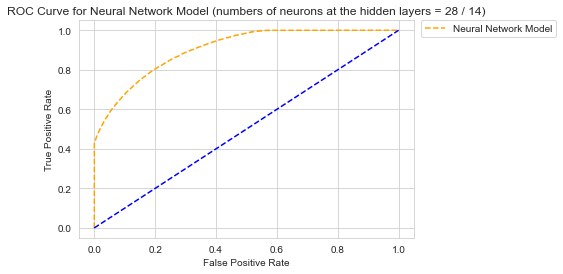

Area under the ROC Curve: 0.9046792624784408



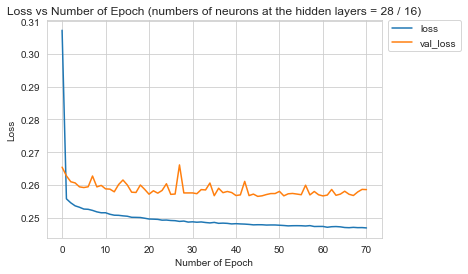

3228/3228 [==============================] - 1s 402us/step


Metrics of the Neural Network Model (numbers of neurons at the hidden layers = 28 / 16):

Based on train data:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94    195354
           1       0.86      0.52      0.65     45654

    accuracy                           0.89    241008
   macro avg       0.88      0.75      0.79    241008
weighted avg       0.89      0.89      0.88    241008

[[191672   3682]
 [ 22091  23563]]

Based on test data:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     83253
           1       0.86      0.50      0.64     20037

    accuracy                           0.89    103290
   macro avg       0.88      0.74      0.79    103290
weighted avg       0.89      0.89      0.88    103290

[[81646  1607]
 [ 9943 10094]]


3228/3228 [==============================] - 1s 412us/step


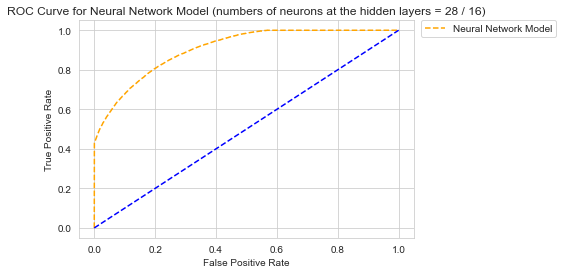

Area under the ROC Curve: 0.90533244432421



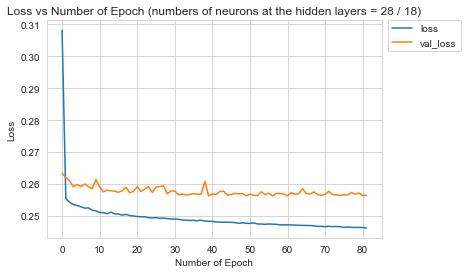

3228/3228 [==============================] - 1s 405us/step


Metrics of the Neural Network Model (numbers of neurons at the hidden layers = 28 / 18):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.93      0.48      0.63     45654

    accuracy                           0.89    241008
   macro avg       0.91      0.73      0.78    241008
weighted avg       0.90      0.89      0.88    241008

[[193799   1555]
 [ 23881  21773]]

Based on test data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94     83253
           1       0.93      0.46      0.62     20037

    accuracy                           0.89    103290
   macro avg       0.91      0.73      0.78    103290
weighted avg       0.89      0.89      0.87    103290

[[82581   672]
 [10772  9265]]


3228/3228 [==============================] - 1s 416us/step


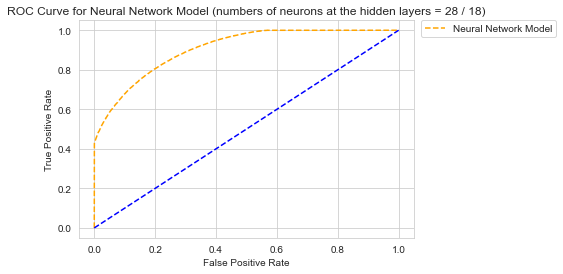

Area under the ROC Curve: 0.9055475383345155



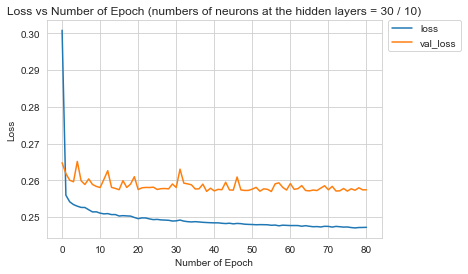

3228/3228 [==============================] - 1s 413us/step


Metrics of the Neural Network Model (numbers of neurons at the hidden layers = 30 / 10):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.93      0.48      0.63     45654

    accuracy                           0.89    241008
   macro avg       0.91      0.73      0.78    241008
weighted avg       0.90      0.89      0.88    241008

[[193778   1576]
 [ 23904  21750]]

Based on test data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94     83253
           1       0.93      0.46      0.62     20037

    accuracy                           0.89    103290
   macro avg       0.91      0.73      0.78    103290
weighted avg       0.89      0.89      0.87    103290

[[82567   686]
 [10785  9252]]


3228/3228 [==============================] - 1s 406us/step


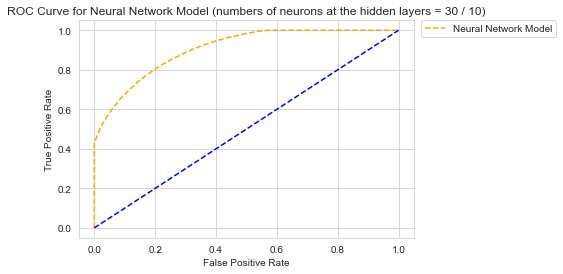

Area under the ROC Curve: 0.9044810555363093



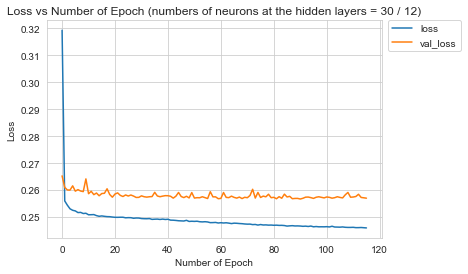

3228/3228 [==============================] - 1s 423us/step


Metrics of the Neural Network Model (numbers of neurons at the hidden layers = 30 / 12):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.94      0.48      0.63     45654

    accuracy                           0.90    241008
   macro avg       0.91      0.74      0.79    241008
weighted avg       0.90      0.90      0.88    241008

[[193879   1475]
 [ 23819  21835]]

Based on test data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94     83253
           1       0.93      0.46      0.62     20037

    accuracy                           0.89    103290
   macro avg       0.91      0.73      0.78    103290
weighted avg       0.89      0.89      0.87    103290

[[82562   691]
 [10758  9279]]


3228/3228 [==============================] - 1s 411us/step


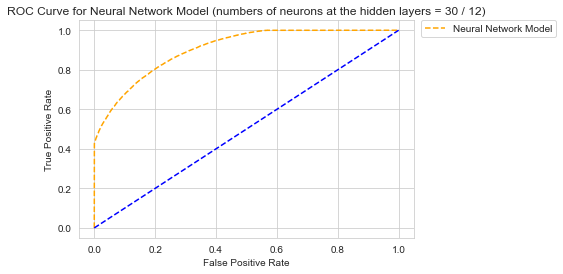

Area under the ROC Curve: 0.9050356497548949



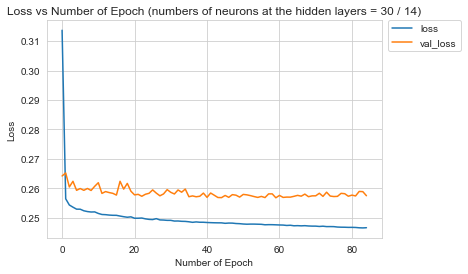

3228/3228 [==============================] - 1s 417us/step


Metrics of the Neural Network Model (numbers of neurons at the hidden layers = 30 / 14):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.95      0.47      0.63     45654

    accuracy                           0.89    241008
   macro avg       0.92      0.73      0.78    241008
weighted avg       0.90      0.89      0.88    241008

[[194290   1064]
 [ 24326  21328]]

Based on test data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94     83253
           1       0.95      0.45      0.61     20037

    accuracy                           0.89    103290
   macro avg       0.92      0.72      0.77    103290
weighted avg       0.90      0.89      0.87    103290

[[82759   494]
 [10965  9072]]


3228/3228 [==============================] - 1s 418us/step


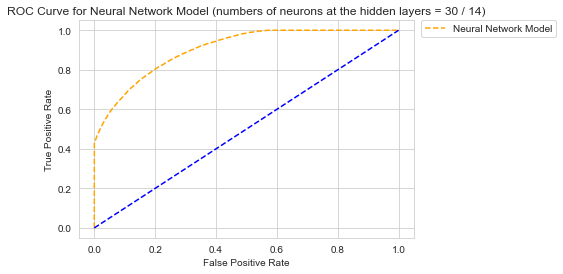

Area under the ROC Curve: 0.9044505838798538



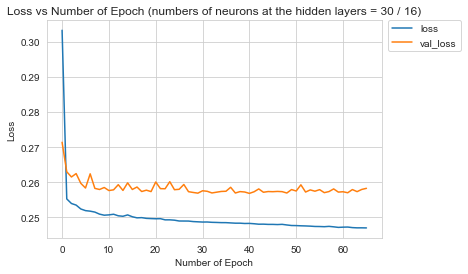

3228/3228 [==============================] - 1s 408us/step


Metrics of the Neural Network Model (numbers of neurons at the hidden layers = 30 / 16):

Based on train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    195354
           1       0.93      0.48      0.63     45654

    accuracy                           0.89    241008
   macro avg       0.91      0.73      0.78    241008
weighted avg       0.90      0.89      0.88    241008

[[193804   1550]
 [ 23885  21769]]

Based on test data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94     83253
           1       0.93      0.46      0.62     20037

    accuracy                           0.89    103290
   macro avg       0.91      0.73      0.78    103290
weighted avg       0.89      0.89      0.87    103290

[[82595   658]
 [10754  9283]]


3228/3228 [==============================] - 1s 404us/step


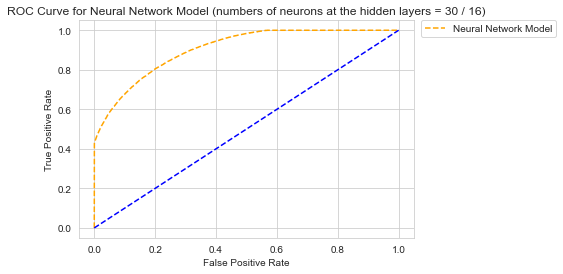

Area under the ROC Curve: 0.904564103104271



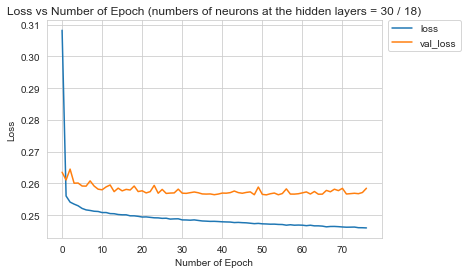

3228/3228 [==============================] - 1s 420us/step


Metrics of the Neural Network Model (numbers of neurons at the hidden layers = 30 / 18):

Based on train data:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94    195354
           1       0.88      0.51      0.65     45654

    accuracy                           0.89    241008
   macro avg       0.89      0.75      0.79    241008
weighted avg       0.89      0.89      0.88    241008

[[192098   3256]
 [ 22370  23284]]

Based on test data:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     83253
           1       0.87      0.50      0.63     20037

    accuracy                           0.89    103290
   macro avg       0.88      0.74      0.78    103290
weighted avg       0.89      0.89      0.88    103290

[[81829  1424]
 [10116  9921]]


3228/3228 [==============================] - 1s 411us/step


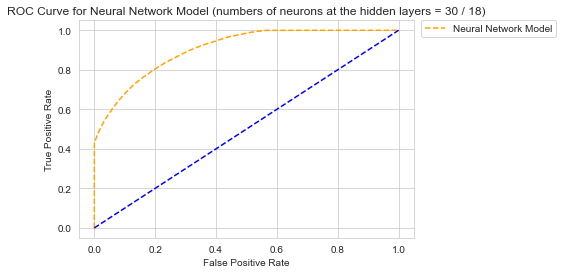

Area under the ROC Curve: 0.905124300268639


Summary of Results:
         No of neurons (1st hidd.)  No of neurons (2nd hidd.)       AUC
Case No                                                                
1                               22                         10  0.904320
2                               22                         12  0.904604
3                               22                         14  0.905086
4                               22                         16  0.904648
5                               22                         18  0.904632
6                               24                         10  0.904846
7                               24                         12  0.905465
8                               24                         14  0.905397
9                               24                         16  0.904862
10                              24                         18  0.904408
11                              26                         10  0.90487

,No of neurons (1st hidd.),No of neurons (2nd hidd.),AUC
Case No,,,
13,26,14,0.90578


In [314]:
# Specify the numbers of neurons to be considered at the 1st hidden layer 
num_neurons_1 = [22, 24, 26, 28, 30] 

# Specify the numbers of neurons to be considered at the 2nd hidden layer 
num_neurons_2 = [10, 12, 14, 16, 18]  

# Initialization of variables
case_no = 1
num_neurons_1_list = []
num_neurons_2_list = []
auc_list = []

# Do a nested for-loop to evaluate every combination case of specified numbers of neurons in the 2 hidden layers
for num_1 in num_neurons_1:
    for num_2 in num_neurons_2:

        # Create an instance of the neural network model
        nnmodel = Sequential()

        # Contruct the first hidden layer of the neural network
        nnmodel.add(Dense(units = num_1, activation='relu'))

        # Contruct the second hidden layer of the neural network
        nnmodel.add(Dense(units = num_2, activation='relu'))
        
        # Contruct the output layer (activation = 'sigmoid' for binary classification)
        nnmodel.add(Dense(units = 1, activation='sigmoid'))

        # Compile the neural network model using Adam (adaptive moment estimation) for optimization
        nnmodel.compile(loss = 'binary_crossentropy', optimizer = 'adam')

        # Employ early stopping to stop training the neural network model if no improvement
        early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 0, patience = 25)

        # Fit the train data to the neural network model
        nnmodel.fit(
                    x = X_train,
                    y = y_train,
                    batch_size = 256,
                    epochs = 500,
                    verbose = 0,
                    validation_data = (X_test,y_test),
                    callbacks = [early_stop]
                    )

        # Plot the Loss vs Number of Epoch curve
        losses = pd.DataFrame(nnmodel.history.history)
        losses[['loss','val_loss']].plot()

        plt.title(f'Loss vs Number of Epoch (numbers of neurons at the hidden layers = {num_1} / {num_2})')

        plt.xlabel('Number of Epoch')

        plt.ylabel('Loss')

        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
        plt.show()

        # Evaluate the neural network model:
        pred_nnmodel_train = (nnmodel.predict(X_train) > 0.5) * 1
        pred_nnmodel_test = (nnmodel.predict(X_test) > 0.5) * 1

        print("")
        print("")
        print(f"Metrics of the Neural Network Model (numbers of neurons at the hidden layers = {num_1} / {num_2}):")
        print("")
        print("Based on train data:")
        print(classification_report(y_train, pred_nnmodel_train))
        print(confusion_matrix(y_train, pred_nnmodel_train))
        print("")
        print("Based on test data:")
        print(classification_report(y_test, pred_nnmodel_test))
        print(confusion_matrix(y_test, pred_nnmodel_test))
        print("")
        print("")

        # roc curve for the neural network model
        fpr_nnmodel, tpr_nnmodel, _ = roc_curve(y_test, nnmodel.predict(X_test))

        # roc curve for tpr = fpr 
        random_probs = [0 for i in range(len(y_test))]
        p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

        # auc score for the neural network model
        auc_score_nnmodel = roc_auc_score(y_test, nnmodel.predict(X_test))

        # plot roc curves
        # plt.figure(figsize=(12,8))
        plt.plot(fpr_nnmodel, tpr_nnmodel, linestyle='--',color='orange', label='Neural Network Model')
        plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

        # title
        plt.title(f'ROC Curve for Neural Network Model (numbers of neurons at the hidden layers = {num_1} / {num_2})')

        # x label
        plt.xlabel('False Positive Rate')

        # y label
        plt.ylabel('True Positive Rate')

        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
        # plt.savefig('ROC',dpi=300)
        plt.show()

        print(f'Area under the ROC Curve: {auc_score_nnmodel}')
        print("")
        print("================================================================================================================")
        print("================================================================================================================")
        
        # Update variables for the next loop
        case_no += 1
        num_neurons_1_list.append(num_1)
        num_neurons_2_list.append(num_2)
        auc_list.append(auc_score_nnmodel)
        
print('')
  
# Create a dataframe to report the summary of results
result_summary_2hiddenlayers = pd.DataFrame({
                                             'Case No': list(range(1, case_no)),
                                             'No of neurons (1st hidd.)': num_neurons_1_list,
                                             'No of neurons (2nd hidd.)': num_neurons_2_list,
                                             'AUC': auc_list
                                           })
result_summary_2hiddenlayers.set_index('Case No', inplace=True)

print('Summary of Results:')
print(result_summary_2hiddenlayers)

print('')

print('Case for the highest area under the ROC Curve:')
nn_2hiddenlayers_bestauc = result_summary_2hiddenlayers[result_summary_2hiddenlayers['AUC'] == result_summary_2hiddenlayers['AUC'].max()]
nn_2hiddenlayers_bestauc

In [315]:
# Best AUC for the case of only 1 hidden layer
nn_1hiddenlayer_bestauc

,No of neurons (hidd.),AUC
Case No,,
4,28,0.905113


In [316]:
# Best AUC for the case of 2 hidden layers
nn_2hiddenlayers_bestauc

,No of neurons (1st hidd.),No of neurons (2nd hidd.),AUC
Case No,,,
13,26,14,0.90578


In [317]:
# Best AUC of the neural network model 
auc_score_nnmodel = float(nn_1hiddenlayer_bestauc['AUC']) if \
                    float(nn_1hiddenlayer_bestauc['AUC']) > float(nn_2hiddenlayers_bestauc['AUC']) \
                    else float(nn_2hiddenlayers_bestauc['AUC'])
auc_score_nnmodel

0.9057799567263153

# Comparison for Model Performance

In this section, we will compare models' performances based on their area under curve (AUC) of receiver operating characteristic (ROC) curves, to see if any significant performance differences among different models.

ROC curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR (True Positive Rate) in Y-axis against FPR (False Positive Rate) in X-axis at various probability threshold values and essentially separates the ‘signal’ from the ‘noise’. AUC is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

Interpretation of AUC values:

    i. When AUC = 1:
    The classifier is able to perfectly distinguish between all the Positive and the Negative class
    points correctly. If, however, the AUC had been 0, then the classifier would be predicting all Negatives as Positives,
    and all Positives as Negatives.

    ii. When 0.5 < AUC < 1:
    There is a high chance that the classifier will be able to distinguish the positive class values
    from the negative class values. This is so because the classifier is able to detect more numbers of True positives and
    True negatives than False negatives and False positives.

    iii. When AUC = 0.5: 
    The classifier is not able to distinguish between Positive and Negative class points. Meaning either the classifier is 
    predicting random class or constant class for all the data points.

So, the higher the AUC value for a classifier, the better its ability to distinguish between positive and negative classes.

Now, we will summarize all the models' AUC into a dataframe and plot a barchart for visualization:

In [320]:
# Summarize models' AUC into a dataframe
model_name = ['Logistic Regression', 'AdaBoost', 'Gradient Boosting',
              'XGBoost', 'Random Forest', 'Neural Network']

model_auc = [auc_score_logmodel, auc_score_adamodel, auc_score_gbmodel,
             auc_score_xgbmodel, auc_score_rfmodel, auc_score_nnmodel]

df_model_performance = pd.DataFrame()
df_model_performance['Model'] = model_name
df_model_performance['AUC'] = model_auc

df_model_performance

,Model,AUC
0,Logistic Regression,0.903501
1,AdaBoost,0.900006
2,Gradient Boosting,0.905196
3,XGBoost,0.905237
4,Random Forest,0.888873
5,Neural Network,0.905780


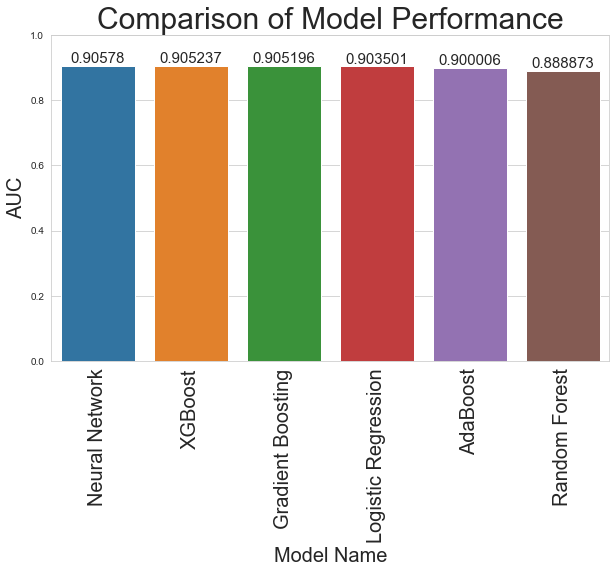

In [321]:
# Plot a bar chart for comparison of model performance
plt.figure(figsize = (10,6))
plot = sns.barplot(x = 'Model', y = 'AUC', data = df_model_performance.sort_values(by = 'AUC', ascending=False))
plot.bar_label(plot.containers[0], fontsize = 15)

plt.title('Comparison of Model Performance', fontsize = 30)
plt.xlabel('Model Name', fontsize = 20)
plt.ylabel('AUC', fontsize = 20)
plt.setp(plot.get_xticklabels(), rotation=90, fontsize = 20)
plot.set_ylim(0,1)

plt.show()

From above, we can see that the performances of different models are quite similar, with the neural network and XGBoost classifier models are among the best. It is worth mentioning that during the machine learning stage, the Gradient Boosting Classifier spent significantly more time for training than XGBoost Classifier did, and obtained very similar performance. This once again shows that XGBoost Classifier is truely a very powerful and fast algorithm.

# Conclusion

In this project, we have built several machine learning models, which can be used to predict if a borrower will potentially charge off. By doing this, the creditor (eg. banks or the LendingClub company for this project) can access if a particular borrower will pay back his or her loan, with the hope of reducing the risks of approving loans to bad customers to a certain extent. From the section of Comparison for Model Performance, we can see that the performances of different models are quite similar in terms of AUC, with an average of about 0.9, which can be considered quite good. 

Despite having good AUC scores, we should also note that the recalls and f1-scores for predictions of actual charge off cases (charge_off = 1) are not that amazing. This may be due to the fact that the dataset is not balanced for the target variable charge_off. For this case, recall is a measure of how well the models can retrieve those actual charge off cases. From the recall values obtained above, we can see that the recalls for case of charge_off = 1 is about 0.5, which is not ideal. This shows that the models produce a lot of false negatives. In other words, they wrongly classified those who in fact did charge off, as did not charge off, hence affect the values of recalls. Perharps by changing the probability thresholds for predicting the charge_off can improve recalls (probability threshold used for this project is 0.5 for all models). However by doing this, it might compromise the values of precisions, as recall and precision are often in tension (precison for our case here is the proportion of predicted charge off cases are actual charge off cases). That is, improving recall typically reduces precision and vice versa. Hence the probability thresholds used for predictions shall be carefully examined if this method is used.

Other methods such as under-sampling or over-sampling can also be employed when dealing with imbalanced data. However, it should be noted that these methods also have their own problems. Under-sampling may cause information loss, and those lost information may be useful for building the models. On the other hand, over-sampling may increases the likelihood of overfitting since it replicates the minority class events.

In addition to those points highlighted above, we should also note that using machine learning algorithm to predict human behavior (eg. whether a person is going to charge off or not in this project) can be quite tricky and shall not be the sole method to decide whether the loans should be approved. For example, as revealed in the exploratory data analysis, people can still charge off despite having annual income of more than 1 million, for a maximum loan amount of 40,000. If the loans were indeed approved for these high annual income customers, obviously in the end the creditor will highly likely result in losses. On the other hand, for good customers who would really pay back their loans get rejected just because of the machine learning algorithm, this will cause the creditor to potentially lose quite a number of good customers.

Every method will have its own pros and cons. For any machine learning model which can be used to predict 'something', especially human behaviour, shall be used with caution and never be used in isolation and its predictions shall always be examined with real-world context.